# Маркетинговое исследование развлекательного приложения Procrastinate Pro+



### Описание проекта

<p></p>

Несмотря на огромные вложения в рекламу, последние несколько месяцев развлекательное приложение Procrastinate Pro+ терпит убытки. <p>


***Цель Исследования:***<p>

- определить стоимость привлечения пользователей приложения;<p>
- оценить окупаемость расходов на привлечение клиентов;<p>
- выявить факторы, мешающие привлечению клиентов.<p>


### Описание данных:<p>

Для обработки предоставлены три датасета. Файл visits_info_short.csv хранит лог сервера с информацией о посещениях сайта, orders_info_short.csv — информацию о заказах, а costs_info_short.csv — информацию о расходах на рекламу.<p>
Структура visits_info_short.csv:<p>
•	User Id — уникальный идентификатор пользователя,<p>
•	Region — страна пользователя,<p>
•	Device — тип устройства пользователя,<p>
•	Channel — идентификатор источника перехода,<p>
•	Session Start — дата и время начала сессии,<p>
•	Session End — дата и время окончания сессии.<p>
Структура orders_info_short.csv:<p>
•	User Id — уникальный идентификатор пользователя,<p>
•	Event Dt — дата и время покупки,<p>
•	Revenue — сумма заказа.<p>
Структура costs_info_short.csv:<p>
•	dt — дата проведения рекламной кампании,<p>
•	Channel — идентификатор рекламного источника,<p>
•	costs — расходы на эту кампанию.<p>

</div> 

## Шаг 1. Загрузка и предобработка данных.

##### Для начала импортируем все необходимые в проекте библиотеки:

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from datetime import datetime, timedelta
from matplotlib import pyplot as plt

##### Импортируем данные и ознакомимся с таблицей:

In [2]:
try:
    visits=pd.read_csv('\\dataset\\visits_info_short.csv')
except:
    visits=pd.read_csv('/datasets/visits_info_short.csv')

In [3]:
try:
    orders=pd.read_csv('\\dataset\\orders_info_short.csv')
except:
    orders=pd.read_csv('/datasets/orders_info_short.csv')

In [4]:
try:
    costs=pd.read_csv('\\dataset\\costs_info_short.csv')
except:
    costs=pd.read_csv('/datasets/costs_info_short.csv')

#### *Посмотрим на данные:*

In [5]:
visits

,User Id,Region,Device,Channel,Session Start,Session End
0,981449118918,United States,iPhone,organic,2019-05-01 02:36:01,2019-05-01 02:45:01
1,278965908054,United States,iPhone,organic,2019-05-01 04:46:31,2019-05-01 04:47:35
2,590706206550,United States,Mac,organic,2019-05-01 14:09:25,2019-05-01 15:32:08
3,326433527971,United States,Android,TipTop,2019-05-01 00:29:59,2019-05-01 00:54:25
4,349773784594,United States,Mac,organic,2019-05-01 03:33:35,2019-05-01 03:57:40
...,...,...,...,...,...,...
309896,329994900775,UK,PC,LeapBob,2019-10-31 13:28:12,2019-10-31 14:39:29
309897,334903592310,France,PC,lambdaMediaAds,2019-10-31 22:14:52,2019-10-31 22:39:36
309898,540102010126,Germany,PC,organic,2019-10-31 01:40:48,2019-10-31 01:41:31
309899,308736936846,Germany,Mac,organic,2019-10-31 07:37:34,2019-10-31 07:37:55


In [6]:
orders

,User Id,Event Dt,Revenue
0,188246423999,2019-05-01 23:09:52,4.99
1,174361394180,2019-05-01 12:24:04,4.99
2,529610067795,2019-05-01 11:34:04,4.99
3,319939546352,2019-05-01 15:34:40,4.99
4,366000285810,2019-05-01 13:59:51,4.99
...,...,...,...
40207,651604369137,2019-10-31 16:19:07,4.99
40208,275341387049,2019-10-31 01:17:17,4.99
40209,374656616484,2019-10-31 06:17:29,4.99
40210,168548862926,2019-10-31 22:46:19,4.99


In [7]:
costs

,dt,Channel,costs
0,2019-05-01,FaceBoom,113.3
1,2019-05-02,FaceBoom,78.1
2,2019-05-03,FaceBoom,85.8
3,2019-05-04,FaceBoom,136.4
4,2019-05-05,FaceBoom,122.1
...,...,...,...
1795,2019-10-23,lambdaMediaAds,4.0
1796,2019-10-24,lambdaMediaAds,6.4
1797,2019-10-25,lambdaMediaAds,8.8
1798,2019-10-26,lambdaMediaAds,8.8


<p></p>

<div style="border:solid black 1px; padding: 20px">
    В базе данных информация о 309901 сессиях пользователей в приложении Procrastinate Pro+, 40212 покупках и 1800 рекламных кампаниях.
Столбцы названы некорректно, требуется приведение к нижнему регистру и замена пробелов.
    
</div>
<p></p>

##### Приведем названия столбцов в корректный вид:

In [8]:
visits.columns=visits.columns.str.lower().str.replace(' ','_')
visits.head(3)

,user_id,region,device,channel,session_start,session_end
0,981449118918,United States,iPhone,organic,2019-05-01 02:36:01,2019-05-01 02:45:01
1,278965908054,United States,iPhone,organic,2019-05-01 04:46:31,2019-05-01 04:47:35
2,590706206550,United States,Mac,organic,2019-05-01 14:09:25,2019-05-01 15:32:08


In [9]:
orders.columns=orders.columns.str.lower().str.replace(' ','_')
orders.head(3)

,user_id,event_dt,revenue
0,188246423999,2019-05-01 23:09:52,4.99
1,174361394180,2019-05-01 12:24:04,4.99
2,529610067795,2019-05-01 11:34:04,4.99


In [10]:
costs.columns=costs.columns.str.lower()
costs.head(3)

,dt,channel,costs
0,2019-05-01,FaceBoom,113.3
1,2019-05-02,FaceBoom,78.1
2,2019-05-03,FaceBoom,85.8


##### Проверим типы данных и наличие пропусков:

In [11]:
visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   user_id        309901 non-null  int64 
 1   region         309901 non-null  object
 2   device         309901 non-null  object
 3   channel        309901 non-null  object
 4   session_start  309901 non-null  object
 5   session_end    309901 non-null  object
dtypes: int64(1), object(5)
memory usage: 14.2+ MB


In [12]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   user_id   40212 non-null  int64  
 1   event_dt  40212 non-null  object 
 2   revenue   40212 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 942.6+ KB


In [13]:
costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   dt       1800 non-null   object 
 1   channel  1800 non-null   object 
 2   costs    1800 non-null   float64
dtypes: float64(1), object(2)
memory usage: 42.3+ KB


<p></p>

<div style="border:solid black 1px; padding: 20px">
    В базах данных пропуски не обнаружены.

Требуется изменение типов данных  в столбцах с датами в формат datetime.
    
</div>
<p></p>

##### Изменим тип данных в столбцах с датами:

In [14]:
visits['session_start']=pd.to_datetime(visits['session_start'])
visits['session_end']=pd.to_datetime(visits['session_end'])
visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   user_id        309901 non-null  int64         
 1   region         309901 non-null  object        
 2   device         309901 non-null  object        
 3   channel        309901 non-null  object        
 4   session_start  309901 non-null  datetime64[ns]
 5   session_end    309901 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(3)
memory usage: 14.2+ MB


In [15]:
orders['event_dt']=pd.to_datetime(orders['event_dt'])
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   user_id   40212 non-null  int64         
 1   event_dt  40212 non-null  datetime64[ns]
 2   revenue   40212 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 942.6 KB


In [16]:
costs['month']=pd.to_datetime(costs['dt']).dt.month
costs['week']=pd.to_datetime(costs['dt']).dt.isocalendar().week
costs['dt']=pd.to_datetime(costs['dt']).dt.date
costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   dt       1800 non-null   object 
 1   channel  1800 non-null   object 
 2   costs    1800 non-null   float64
 3   month    1800 non-null   int64  
 4   week     1800 non-null   UInt32 
dtypes: UInt32(1), float64(1), int64(1), object(2)
memory usage: 65.2+ KB


<p></p>

<div style="border:solid black 1px; padding: 20px">
Тип данных в столбцах с датами переведен в формат datetime.
    
</div>
<p></p>

#####  Проверим наличие дубликатов в данных:

In [17]:
visits.duplicated().sum()

0

In [18]:
visits['region'].unique()

array(['United States', 'UK', 'France', 'Germany'], dtype=object)

In [19]:
visits['device'].unique()

array(['iPhone', 'Mac', 'Android', 'PC'], dtype=object)

In [20]:
visits['channel'].unique()

array(['organic', 'TipTop', 'RocketSuperAds', 'YRabbit', 'FaceBoom',
       'MediaTornado', 'AdNonSense', 'LeapBob', 'WahooNetBanner',
       'OppleCreativeMedia', 'lambdaMediaAds'], dtype=object)

In [21]:
orders.duplicated().sum()

0

In [22]:
costs.duplicated().sum()

0

<p></p>

<div style="border:solid black 1px; padding: 20px">
    Дубликатов в базах данных не обнаружено.
</div>
<p></p>



### Вывод

<p></p>

<div style="border:solid green 2px; padding: 20px">

  В исследовании анализируется информация о 309901 сессиях пользователей в приложении Procrastinate Pro+, 40212 покупках и 1800 рекламных кампаниях.<p>
    На этапе предобработки удаление данных не потребовалось. Были исправлены названия столбцов, приведены в формат datetime столбцы с информацией о дате и времени во всех базах.<p>
       
</div>
<p></p>

## Шаг 2. Внесем функции для расчёта и анализа LTV, ROI, удержания и конверсии.

##### Функция для создания пользовательских профилей :

In [23]:
def get_profiles(sessions, orders, ad_costs):

    profiles = (
        sessions.sort_values(by=['user_id', 'session_start'])
        .groupby('user_id')
        .agg(
            {
                'session_start': 'first',
                'channel': 'first',
                'device': 'first',
                'region': 'first',
            }
        )
        .rename(columns={'session_start': 'first_ts'})
        .reset_index()
    )

    profiles['dt'] = profiles['first_ts'].dt.date
    profiles['month'] = profiles['first_ts'].dt.month

    profiles['payer'] = profiles['user_id'].isin(orders['user_id'].unique())

    new_users = (
        profiles.groupby(['dt', 'channel'])
        .agg({'user_id': 'nunique'})
        .rename(columns={'user_id': 'unique_users'})
        .reset_index()
    )

    ad_costs = ad_costs.merge(new_users, on=['dt', 'channel'], how='left')

    ad_costs['acquisition_cost'] = ad_costs['costs'] / ad_costs['unique_users']

    profiles = profiles.merge(
        ad_costs[['dt', 'channel', 'acquisition_cost']],
        on=['dt', 'channel'],
        how='left',
    )

    profiles['acquisition_cost'] = profiles['acquisition_cost'].fillna(0)

    return profiles


#### Функция для расчёта удержания:

In [24]:
def get_retention(
    profiles,
    sessions,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    dimensions = ['payer'] + dimensions

    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    result_raw = result_raw.merge(
        sessions[['user_id', 'session_start']], on='user_id', how='left'
    )
    result_raw['lifetime'] = (
        result_raw['session_start'] - result_raw['first_ts']
    ).dt.days

    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    return result_raw, result_grouped, result_in_time 

#### Функция для расчёта конверсии:

In [25]:
def get_conversion(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    first_purchases = (
        purchases.sort_values(by=['user_id', 'event_dt'])
        .groupby('user_id')
        .agg({'event_dt': 'first'})
        .reset_index()
    )

    result_raw = result_raw.merge(
        first_purchases[['user_id', 'event_dt']], on='user_id', how='left'
    )

    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days

    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users' 
        dimensions = dimensions + ['cohort']

    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        result = result.fillna(0).cumsum(axis = 1)
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    if 'cohort' in dimensions: 
        dimensions = []

    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    return result_raw, result_grouped, result_in_time

#### Функция для расчёта LTV и ROI:

In [26]:
def get_ltv(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    result_raw = result_raw.merge(
        purchases[['user_id', 'event_dt', 'revenue']], on='user_id', how='left'
    )

    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days

    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users'
        dimensions = dimensions + ['cohort']


    def group_by_dimensions(df, dims, horizon_days):
        
        result = df.pivot_table(
            index=dims, columns='lifetime', values='revenue', aggfunc='sum'
        )
        
        result = result.fillna(0).cumsum(axis=1)
        
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        
        result = result.div(result['cohort_size'], axis=0)
        
        result = result[['cohort_size'] + list(range(horizon_days))]
        
        result['cohort_size'] = cohort_sizes

        
        cac = df[['user_id', 'acquisition_cost'] + dims].drop_duplicates()

        
        cac = (
            cac.groupby(dims)
            .agg({'acquisition_cost': 'mean'})
            .rename(columns={'acquisition_cost': 'cac'})
        )

        
        roi = result.div(cac['cac'], axis=0)

        
        roi = roi[~roi['cohort_size'].isin([np.inf])]

        
        roi['cohort_size'] = cohort_sizes

        
        roi['cac'] = cac['cac']

        
        roi = roi[['cohort_size', 'cac'] + list(range(horizon_days))]

        
        return result, roi

    
    result_grouped, roi_grouped = group_by_dimensions(
        result_raw, dimensions, horizon_days
    )

    
    if 'cohort' in dimensions:
        dimensions = []

    
    result_in_time, roi_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    return (
        result_raw,  
        result_grouped,  
        result_in_time,  
        roi_grouped,  
        roi_in_time,  
    ) 


#### Функция для сглаживания фрейма:

In [27]:
def filter_data(df, window):
    
    for column in df.columns.values:
        df[column] = df[column].rolling(window).mean() 
    return df

#### Функция для визуализации удержания:

In [28]:
def plot_retention(retention, retention_history, horizon, window=7):

    plt.figure(figsize=(15, 10))

    retention = retention.drop(columns=['cohort_size', 0])
    
    retention_history = retention_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    if retention.index.nlevels == 1:
        retention['cohort'] = 'All users'
        retention = retention.reset_index().set_index(['cohort', 'payer'])

    ax1 = plt.subplot(2, 2, 1)
    retention.query('payer == True').droplevel('payer').T.plot(
        grid=True, ax=ax1
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание платящих пользователей')

    ax2 = plt.subplot(2, 2, 2, sharey=ax1)
    retention.query('payer == False').droplevel('payer').T.plot(
        grid=True, ax=ax2
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание неплатящих пользователей')

    ax3 = plt.subplot(2, 2, 3)

    columns = [
        name
        for name in retention_history.index.names
        if name not in ['dt', 'payer']
    ]
    
    filtered_data = retention_history.query('payer == True').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания платящих пользователей на {}-й день'.format(
            horizon
        )
    )

    
    ax4 = plt.subplot(2, 2, 4, sharey=ax3)
    
    filtered_data = retention_history.query('payer == False').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax4)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания неплатящих пользователей на {}-й день'.format(
            horizon
        )
    )
    
    plt.tight_layout()
    plt.show() 

#### Функция для визуализации конверсии:

In [29]:
def plot_conversion(conversion, conversion_history, horizon, window=7):

    plt.figure(figsize=(15, 5))

    conversion = conversion.drop(columns=['cohort_size'])
    
    conversion_history = conversion_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    
    ax1 = plt.subplot(1, 2, 1)
    conversion.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Конверсия пользователей')

    
    ax2 = plt.subplot(1, 2, 2, sharey=ax1)
    columns = [
        
        name for name in conversion_history.index.names if name not in ['dt']
    ]
    filtered_data = conversion_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика конверсии пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show() 

#### Функция для визуализации LTV и ROI:

In [30]:
def plot_ltv_roi(ltv, ltv_history, roi, roi_history, horizon, window=7):

    plt.figure(figsize=(20, 20))

    ltv = ltv.drop(columns=['cohort_size'])
    
    ltv_history = ltv_history.drop(columns=['cohort_size'])[[horizon - 1]]

    
    cac_history = roi_history[['cac']]
    
    roi = roi.drop(columns=['cohort_size', 'cac'])
    roi_history = roi_history.drop(columns=['cohort_size', 'cac'])[
        [horizon - 1]
    ]

    ax1 = plt.subplot(3, 2, 1)
    ltv.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('LTV')

    ax2 = plt.subplot(3, 2, 2, sharey=ax1)
    columns = [name for name in ltv_history.index.names if name not in ['dt']]
    filtered_data = ltv_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика LTV пользователей на {}-й день'.format(horizon))

    ax3 = plt.subplot(3, 2, 4, sharey=ax1)
    columns = [name for name in cac_history.index.names if name not in ['dt']]
    filtered_data = cac_history.pivot_table(
        index='dt', columns=columns, values='cac', aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика стоимости привлечения пользователей')

    ax4 = plt.subplot(3, 2, 5)
    roi.T.plot(grid=True, ax=ax4)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('ROI')

    ax5 = plt.subplot(3, 2, 6, sharey=ax4)
    columns = [name for name in roi_history.index.names if name not in ['dt']]
    filtered_data = roi_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax5)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.xlabel('Дата привлечения')
    plt.title('Динамика ROI пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show()



### Вывод

<p></p>

<div style="border:solid green 2px; padding: 20px">
Заданы функции для вычисления значений метрик:<p>
•	get_profiles() — для создания профилей пользователей,<p>
•	get_retention() — для подсчёта Retention Rate,<p>
•	get_conversion() — для подсчёта конверсии,<p>
•	get_ltv() — для подсчёта LTV.<p>
А также функции для построения графиков:<p>
•	filter_data() — для сглаживания данных,<p>
•	plot_retention() — для построения графика Retention Rate,<p>
•	plot_conversion() — для построения графика конверсии,<p>
•	plot_ltv_roi() — для визуализации LTV и ROI.<p>

</div>

## Шаг 3. Исследовательский анализ данных.

##### Составим профили пользователей:

In [31]:
all_profiles = get_profiles(visits, orders, costs)
all_profiles

,user_id,first_ts,channel,device,region,dt,month,payer,acquisition_cost
0,599326,2019-05-07 20:58:57,FaceBoom,Mac,United States,2019-05-07,5,True,1.088172
1,4919697,2019-07-09 12:46:07,FaceBoom,iPhone,United States,2019-07-09,7,False,1.107237
2,6085896,2019-10-01 09:58:33,organic,iPhone,France,2019-10-01,10,False,0.000000
3,22593348,2019-08-22 21:35:48,AdNonSense,PC,Germany,2019-08-22,8,False,0.988235
4,31989216,2019-10-02 00:07:44,YRabbit,iPhone,United States,2019-10-02,10,False,0.230769
...,...,...,...,...,...,...,...,...,...
150003,999956196527,2019-09-28 08:33:02,TipTop,iPhone,United States,2019-09-28,9,False,3.500000
150004,999975439887,2019-10-21 00:35:17,organic,PC,UK,2019-10-21,10,False,0.000000
150005,999976332130,2019-07-23 02:57:06,TipTop,iPhone,United States,2019-07-23,7,False,2.600000
150006,999979924135,2019-09-28 21:28:09,MediaTornado,PC,United States,2019-09-28,9,False,0.205714


#### Оценим период анализа данных и количество платящих клиентов:

In [32]:
all_profiles['first_ts'].min()

Timestamp('2019-05-01 00:00:41')

In [33]:
all_profiles['first_ts'].max()

Timestamp('2019-10-27 23:59:04')

In [34]:
pay_count=all_profiles['payer'].sum()
conv = (all_profiles['payer'].mean()*100).round(2)
print(f'Количество платящих клиентов:{pay_count},  конвертация в платящих клиентов:{conv}%')


Количество платящих клиентов:8881,  конвертация в платящих клиентов:5.92%


<p></p>

<div style="border:solid black 1px; padding: 20px">
    В базе данных информация о 150008 пользователях, впервые воспользовавшихся приложением в период с 1 мая 2019 по 27 октября 2019 года. Среди них 8881 платящих клиентов, конверсия пользователей в платящих клиентов - менее 6%.
    </div>
<p></p>

#### Оценим количество пользователей по странам:

In [35]:
def pivot_profiles (data, tag):
    result=data.pivot_table(index=tag, values='payer', aggfunc=('count','sum','mean')).rename(
    columns={'count': 'all_users', 'sum': 'payers', 'mean': 'CR'}).sort_values(by='all_users', ascending=False)
    return result

In [36]:
pivot_profiles(all_profiles, ['region'])

,all_users,CR,payers
region,,,
United States,100002,0.069019,6902
UK,17575,0.039829,700
France,17450,0.037994,663
Germany,14981,0.041119,616


<p></p>

<div style="border:solid black 1px; padding: 20px">
    Две трети пользователей приложения проживают в США, и среди них же наибольшая доля платящих клиентов - почти 7%. Популярность приложения в других странах гораздо ниже: ~ 17500 пользователей во Франции и Великобритании и менее 15 000 - в Германии, доля платящих среди них ~ 4%.
</div>
<p></p>

In [37]:
pivot_profiles(all_profiles, ['device'])

,all_users,CR,payers
device,,,
iPhone,54479,0.062079,3382
Android,35032,0.058518,2050
PC,30455,0.050468,1537
Mac,30042,0.063644,1912


<p></p>

<div style="border:solid black 1px; padding: 20px">
Пользователи приложения чаще пользуются iPhone, на второй позиции - Android, пользователей с РС и Мас делят третье место. В отношении платящих клиентов лидером является Мас с 6.4%, затем iPhone с 6.2% платящих пользователей. Доля платящих клиентов, пользующихся устройствами с Android, - 5.8%, наименьший показатель у РС - 5.0%. 
</div>
<p></p>

In [38]:
channel_users = pivot_profiles(all_profiles, ['channel'])
channel_users

,all_users,CR,payers
channel,,,
organic,56439,0.020553,1160
FaceBoom,29144,0.122049,3557
TipTop,19561,0.096007,1878
OppleCreativeMedia,8605,0.027077,233
LeapBob,8553,0.030633,262
WahooNetBanner,8553,0.052964,453
RocketSuperAds,4448,0.079137,352
MediaTornado,4364,0.035747,156
YRabbit,4312,0.038265,165


<p></p>

<div style="border:solid black 1px; padding: 20px">
Треть пользователей нашли приложение самостоятельно, но среди этой когорты самая низкая конверсия в платильщиков - всего 2%.
Среди рекламных источников больше всего пользователей принесли FaceBoom (29144) и TipTop (19561), в тройку также можно включить OppleCreativeMedia, LeapBob и WahooNetBanner, каждый из которых привлек более 8500 пользователей. Наименьшее количество пользователей привлекли lambdaMediaAds (2149) и AdNonSense (3880). 
С точки зрения конвертации картина меняется, и если лидерство сохраняет FaceBoom с показетелем конвертации в платящих клиентов более 12%, то среди пользователей lambdaMediaAds и AdNonSense конвертация составляет более 10%. OppleCreativeMedia, наоборот, среди рекламных источников демонстрирует наименьший показатель по доле платящих клиентов - менее 3%.
</div>
<p></p>


### Вывод

<p></p>

<div style="border:solid green 2px; padding: 20px">

В период с 1 мая по 27 октября 2019 года к приложению присоединились 150008 пользователей, платящих клиентов среди них 8881, то есть менее 6%.<p>
Наиболее популярно приложение среди пользователей, проживающих в США, как по количеству пользователей, так и по числу платящих клиентов. <p>
Чаще приложением пользуются с мобильных устройств iPhone и Android, доля платяших клиентов выше среди пользователей iPhone и Mac.<p>
Из рекламных источников больше пользователей привлекли FaceBoom и TipTop. Доля платящих клиентов наиболее высока среди пользователей, привлеченных FaceBoom, lambdaMediaAds и AdNonSense. 
    

</div>


## Шаг 4. Маркетинг.

##### Рассчитаем общую сумму расходов на маркетинг:

In [39]:
costs['costs'].sum()

105497.30000000002

In [40]:
cost_ads=costs.pivot_table(index='channel', values='costs', aggfunc='sum').sort_values(by='costs', ascending=False)
cost_ads['perc']=(100*cost_ads['costs']/costs['costs'].sum()).round(2)
cost_ads

,costs,perc
channel,,
TipTop,54751.30,51.90
FaceBoom,32445.60,30.75
WahooNetBanner,5151.00,4.88
AdNonSense,3911.25,3.71
OppleCreativeMedia,2151.25,2.04
RocketSuperAds,1833.00,1.74
LeapBob,1797.60,1.70
lambdaMediaAds,1557.60,1.48
MediaTornado,954.48,0.90


<p></p>

<div style="border:solid black 1px; padding: 20px">
Расходы на маркетинг за анализируемый период составили более 100 000\$. Более половины составляет оплата рекламы на TipTop, треть затрат приходится на FaceBoom, другие источники рекламы обошлись гораздо дешевле. Наименьшие затраты (менее 1000\$) на рекламу в MediaTornado и YRabbit.
    </div>
<p></p>

#### Проанализируем динамику изменения расходов во времени по каждому источнику:

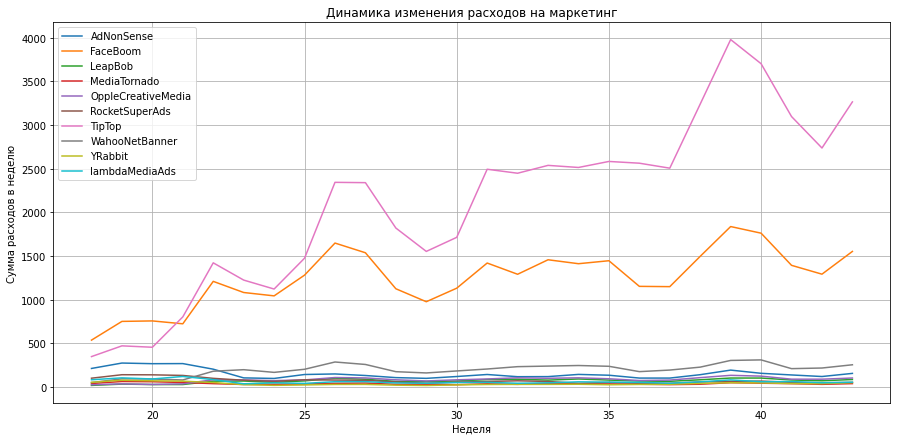

In [41]:
costs.pivot_table(index='channel', columns='week', values='costs', aggfunc='sum').T.plot(figsize=(15, 7), grid=True)
plt.legend()
plt.xlabel('Неделя')
plt.ylabel('Сумма расходов в неделю')
plt.title('Динамика изменения расходов на маркетинг')
plt.show();

<p></p>

<div style="border:solid black 1px; padding: 20px">
За анализируемый период в четыре раза возросли затраты на рекламу на TipTop, и в два раза - на FaceBoom, другие источники рекламы обходятся дешевле 250\$ в неделю.
    </div>
<p></p>

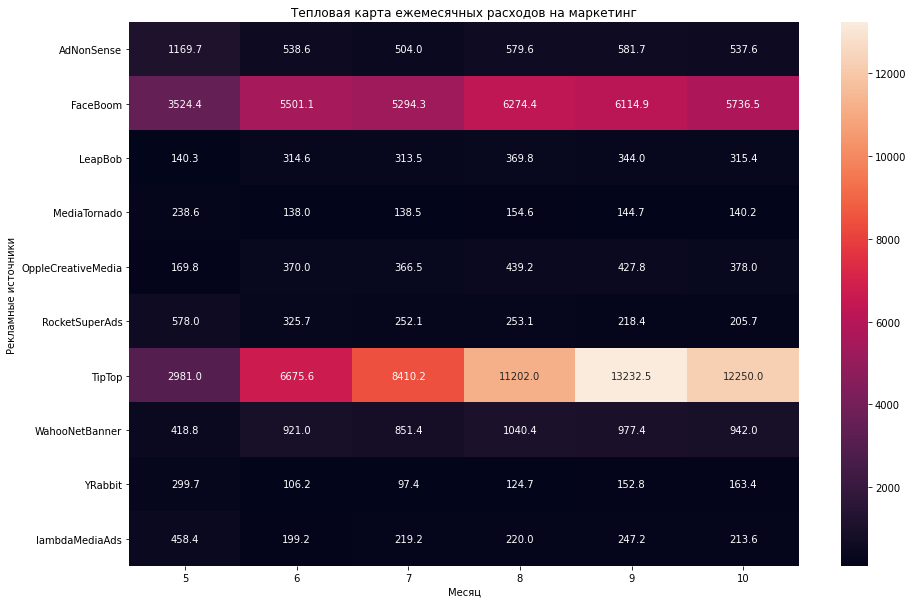

In [42]:
ad_in_month = costs.pivot_table(index='channel', columns='month', values='costs', aggfunc='sum')
plt.figure(figsize=(15, 10))  
sns.heatmap(ad_in_month, annot=True, fmt='.1f')
plt.xlabel('Месяц')
plt.ylabel('Рекламные источники')
plt.title('Тепловая карта ежемесячных расходов на маркетинг')  
plt.show()

<p></p>

<div style="border:solid black 1px; padding: 20px">
    Помесячная динамика расходов на маркетинг повторяет тенденцию с разбивкой по неделям:  затраты на рекламу на TipTop и FaceBoom растут, затраты на другие источники рекламы стабильно невысоки. 
</div>
<p></p>

#### Оценим и визуализируем стоимость привлечения пользователей в различных рекламных источниках:

In [43]:
channel_cost = all_profiles.pivot_table(index='channel', values='acquisition_cost', 
                         aggfunc='mean').rename(columns={'acquisition_cost': 'cac'}).sort_values(by='cac',ascending=False)
channel_cost

,cac
channel,
TipTop,2.799003
FaceBoom,1.113286
AdNonSense,1.008054
lambdaMediaAds,0.724802
WahooNetBanner,0.602245
RocketSuperAds,0.412095
OppleCreativeMedia,0.250000
YRabbit,0.218975
MediaTornado,0.218717


In [44]:
channel_cost = (
    channel_cost.merge(channel_users, on='channel', how='left')
    .fillna(len(all_profiles.loc[all_profiles['channel']=='organic'])))
channel_cost

,cac,all_users,CR,payers
channel,,,,
TipTop,2.799003,19561,0.096007,1878
FaceBoom,1.113286,29144,0.122049,3557
AdNonSense,1.008054,3880,0.113402,440
lambdaMediaAds,0.724802,2149,0.104700,225
WahooNetBanner,0.602245,8553,0.052964,453
RocketSuperAds,0.412095,4448,0.079137,352
OppleCreativeMedia,0.250000,8605,0.027077,233
YRabbit,0.218975,4312,0.038265,165
MediaTornado,0.218717,4364,0.035747,156


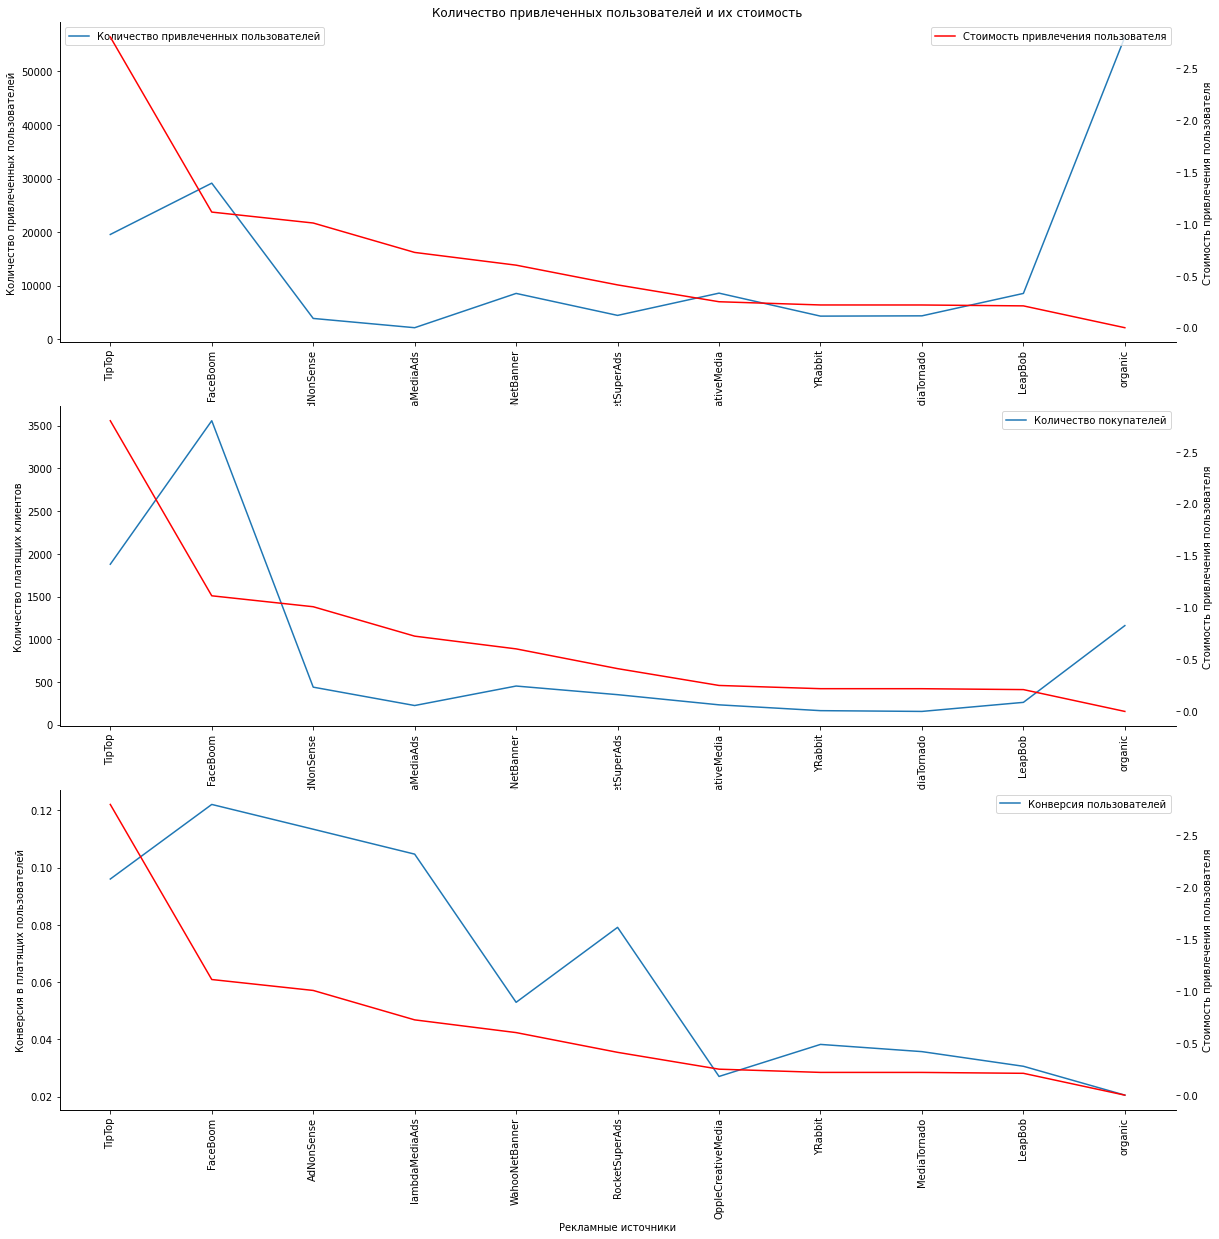

In [45]:
plt.figure(figsize=(20, 20))

ax1 = plt.subplot(3, 1, 1)
lineplot = sns.lineplot(x=channel_cost.index, y=channel_cost['all_users'], data=channel_cost,
                        label='Количество привлеченных пользователей', legend=True)
sns.despine()
plt.xticks(rotation=90)
plt.xlabel('Рекламные источники')
plt.ylabel('Количество привлеченных пользователей')
plt.title('Количество привлеченных пользователей и их стоимость')

ax2 = ax1.twinx()
lineplot2 = sns.lineplot(x=channel_cost.index, y=channel_cost['cac'], 
                         ax=ax2, color="r", label='Стоимость привлечения пользователя', legend=True)
sns.despine()
plt.ylabel('Стоимость привлечения пользователя')


ax3 = plt.subplot(3, 1, 2)
lineplot3 = sns.lineplot(x=channel_cost.index, y=channel_cost['payers'], data=channel_cost,
                        label='Количество покупателей', legend=True)
sns.despine()
plt.xticks(rotation=90)
plt.xlabel('Рекламные источники')
plt.ylabel('Количество платящих клиентов')

ax4 = ax3.twinx()
lineplot4 = sns.lineplot(x=channel_cost.index, y=channel_cost['cac'], 
                         ax=ax4, color="r", label='Стоимость привлечения пользователя', legend=False)
sns.despine()
plt.ylabel('Стоимость привлечения пользователя')

ax5 = plt.subplot(3, 1, 3)
lineplot5 = sns.lineplot(x=channel_cost.index, y=channel_cost['CR'], data=channel_cost,
                        label='Конверсия пользователей', legend=True)
sns.despine()
plt.xticks(rotation=90)
plt.xlabel('Рекламные источники')
plt.ylabel('Конверсия в платящих пользователей')

ax6 = ax5.twinx()
lineplot6 = sns.lineplot(x=channel_cost.index, y=channel_cost['cac'], 
                         ax=ax6, color="r", label='Стоимость привлечения пользователя', legend=False)
sns.despine()
plt.ylabel('Стоимость привлечения пользователя')
plt.show()

<p></p>

<div style="border:solid black 1px; padding: 20px">
    Дороже всего обходится привлечение одного пользователя на TipTop, при этом данная платформа не является лидером ни по количеству привлеченных пользователей и платящих клиентов, ни по конверсии. <p>
    Привлечение пользователя на FaceBoom обходится дешевле в 2,5 раза, но и количество присоединившихся, и количество платящих пользователей, и конверсия максимальны по сравнению с другими рекламными источниками, по которым количество привлеченных и платящих пользователей невелико.<p>
    Самостоятельно присоединившиеся пользователи, насмотря на низкий показатель конверсии, на третьем месте по количеству платящих пользователей. 
   
</div>
<p></p>


### Вывод

<p></p>

<div style="border:solid green 2px; padding: 20px">

Мы изучили различия в динамике изменения расходов по источникам рекламы.<p>
За полгода произошел значительный рост расходов на рекламу на двух прощадках TipTop и FaceBoom, остальные обходятся компании дешевле и расходы на их услуги сохраняются на стабильном, невысоком уровне. <p>
При этом затраты на привлечение одного пользователя  на TipTop неоправданно высоки, так как ее результаты по количеству привлеченных пользователей и платящих клиентов и конверсии хуже, чем у FaceBoom, который обходится компании значительно дешевле.<p>
Самостоятельно присоединившиеся пользователи, насмотря на низкий показатель конверсии, на третьем месте по количеству платящих пользователей за счет наибольшего количества пользователей данной категории.
    

</div>


## Шаг 5. Оценка окупаемости рекламы.

##### Рассчитаем и визуализируем LTV, ROI и CAC для всех пользователей:

In [46]:
observation_date = datetime(2019,11,1).date()
ltw_raw, ltv, ltv_history, roi, roi_history = get_ltv(
    all_profiles, orders, observation_date, 14)

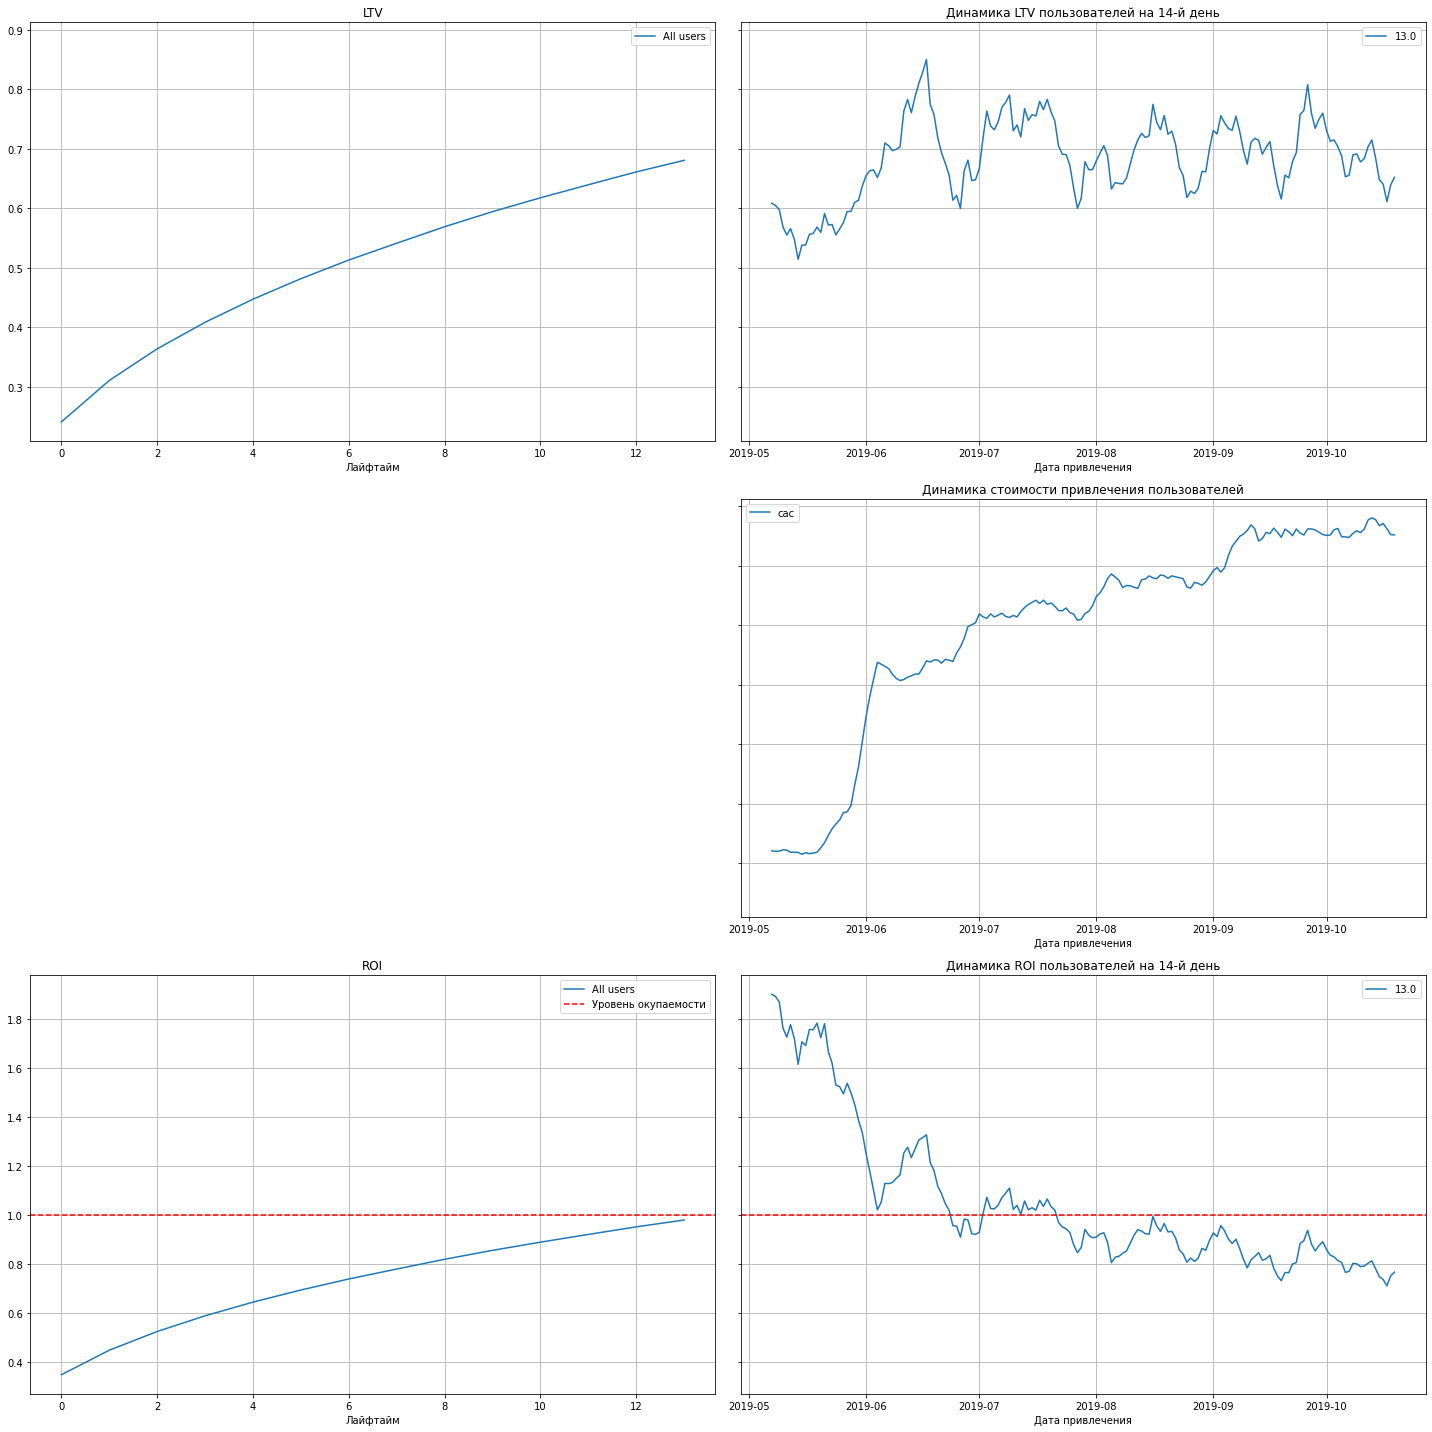

In [47]:
plot_ltv_roi(ltv, ltv_history, roi, roi_history, 14, window=7)

<p></p>

<div style="border:solid black 1px; padding: 20px">
    LTV пользователя приложения менее 1\$, при этом на протяжении всего периода анализа LTV 14 дня удерживается около 0.7\$.     При этом затраты на рекламу стабильно растут и не окупаются, а ROI в течение анализируемого периода снижается.<p>
Проверим данные показатели для пользователей, привлеченных рекламными источниками.
    </div>
<p></p>

##### Рассчитаем и визуализируем LTV, ROI и CAC для пользователей, привлеченных рекламными источниками:

In [48]:
pay = all_profiles.loc[(all_profiles['channel']!='organic')]
ltw_raw_pay, ltv_pay, ltv_history_pay, roi_pay, roi_history_pay = get_ltv(
    pay, orders, observation_date, 14)

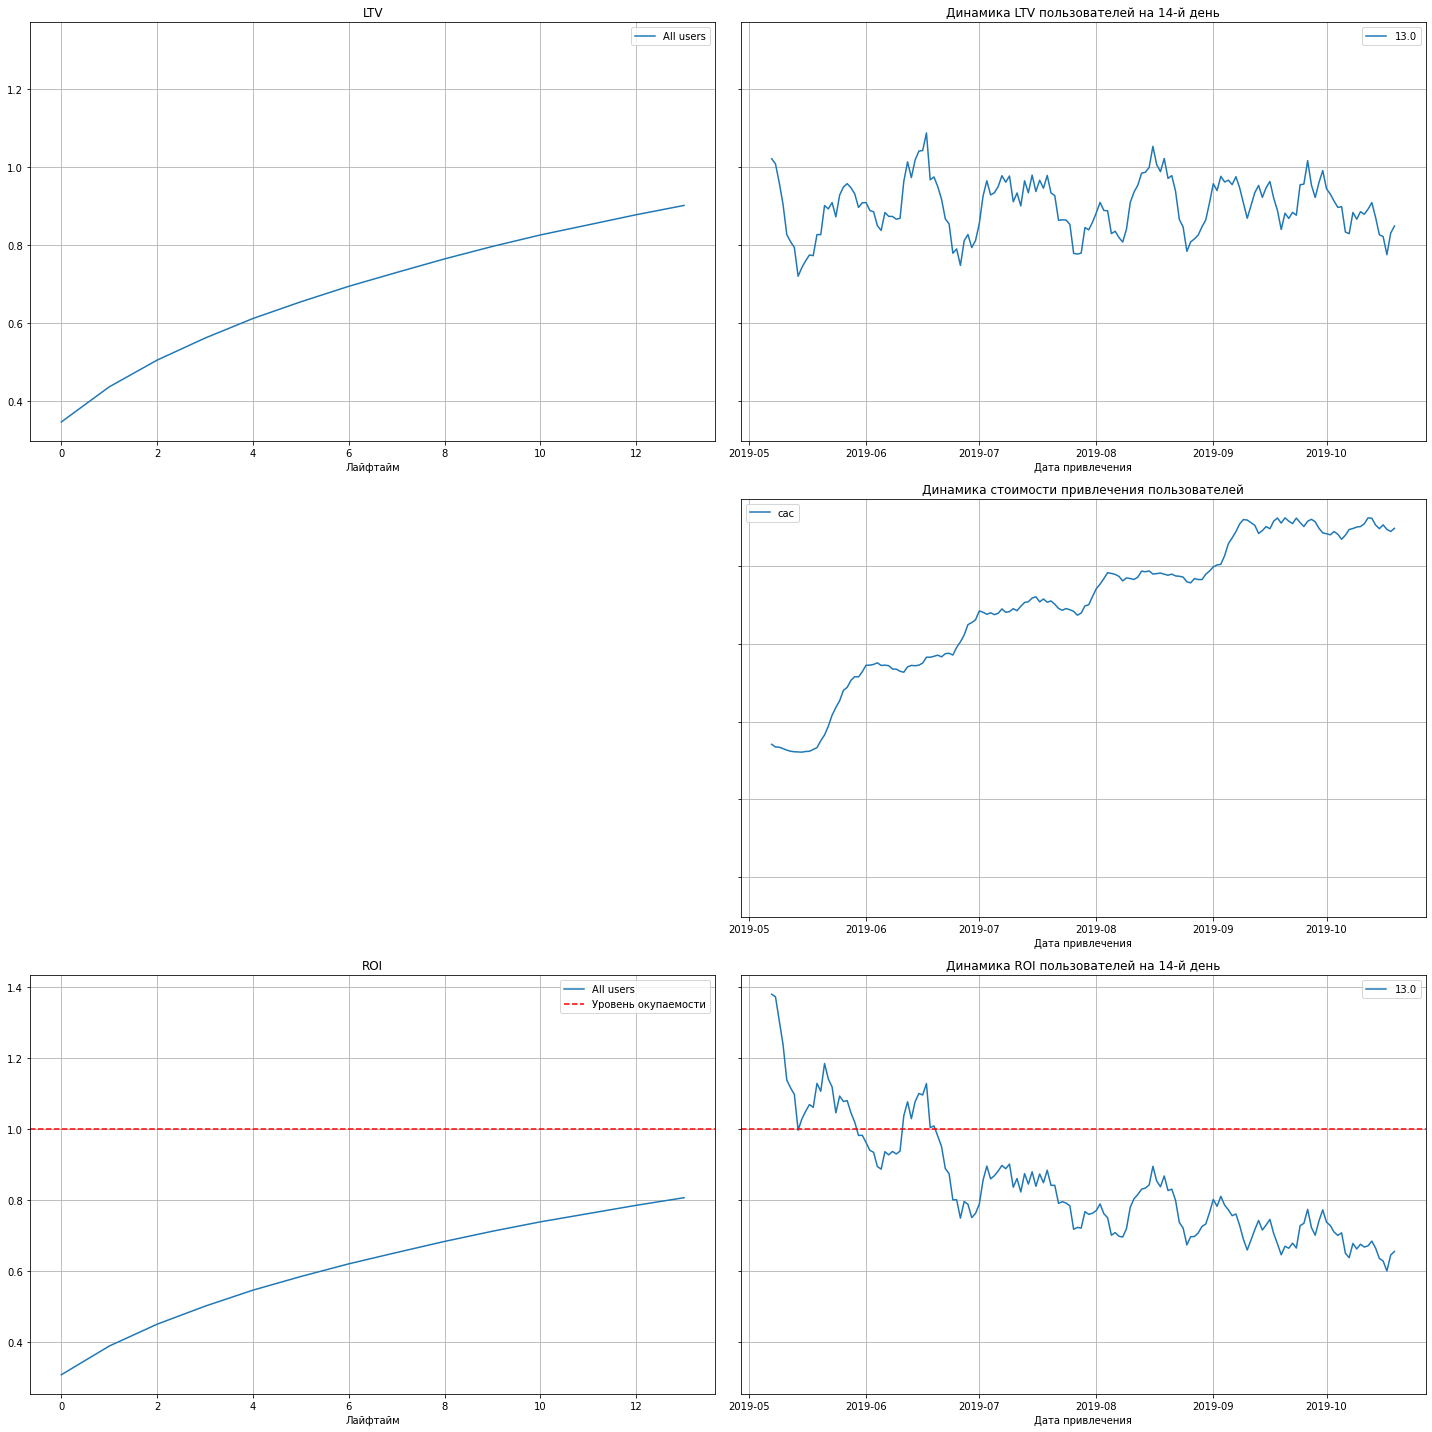

In [49]:
plot_ltv_roi(ltv_pay, ltv_history_pay, roi_pay, roi_history_pay, 14, window=7)

<p></p>

<div style="border:solid black 1px; padding: 20px">
     LTV пользователей приложения, привлеченных рекламными источниками, также менее 1\$, хотя на 0.2\$ выше LTV для всей выборки, средний LTV 14 дня составляет ~0.9\$. Пересчет стоимости привлечения пользователей показывает бóльшие значения, ROI снижается и существенно ниже уровня окупаемости, то есть реклама, направленная на привлечение пользователей, не окупается, и  ситуация в течение полугодия ухудшалась.<p>
Поскольку нашей задачей является анализ окупаемости рекламы, исключим из анализа в дальнейшем пользователей, присоединивцихся к приложенияю самостоятельно.
    </div>
<p></p>

##### Расчитаем и визуализируем конверсию пользователей и ее динамику:

In [50]:
conversion_raw_pay, conversion_pay, conversion_history_pay = get_conversion(pay, orders, observation_date, 14)
retention_raw_pay, retention_pay, retention_history_pay = get_retention(pay, visits, observation_date, 14)

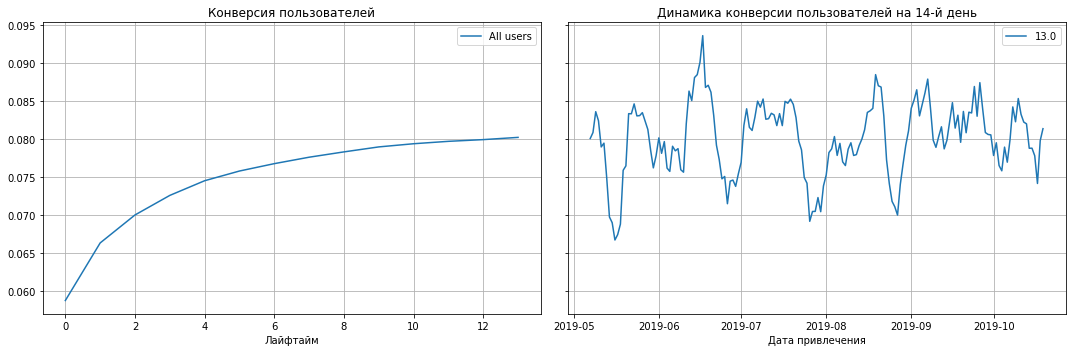

In [51]:
plot_conversion(conversion_pay, conversion_history_pay, 14, window=7)

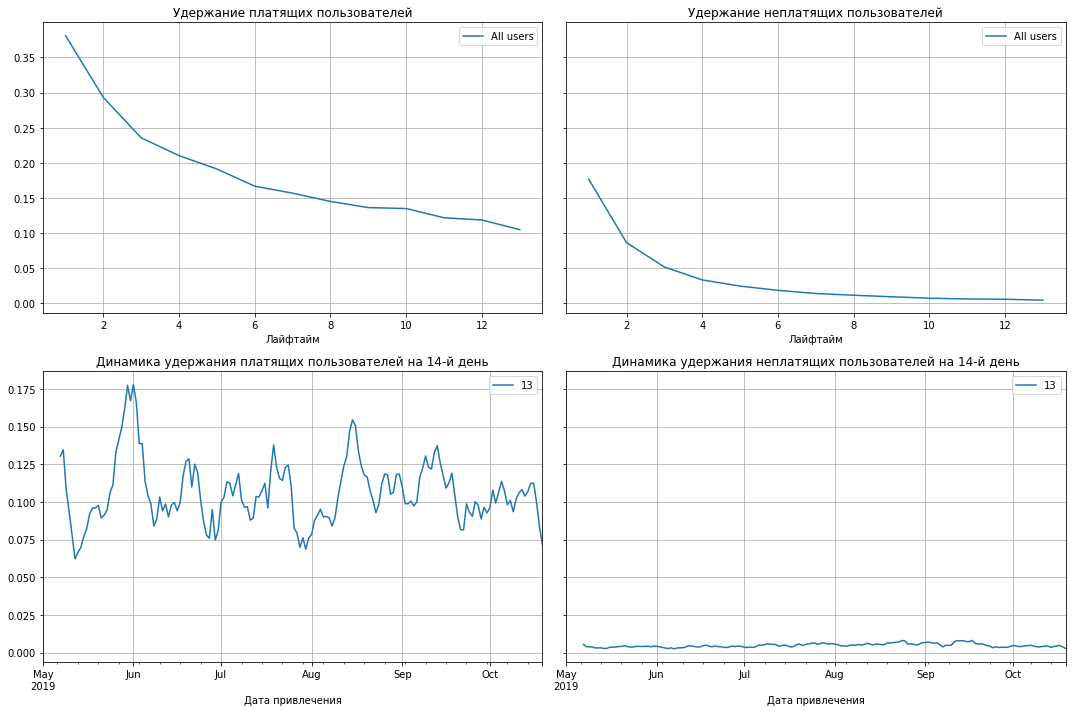

In [52]:
plot_retention(retention_pay, retention_history_pay, 14, window=7)

<p></p>

<div style="border:solid black 1px; padding: 20px">
    Конверсия пользователей, привлеченных рекламными источниками, на 14 день лайфтайма в течение периода анализа заметно колеблется, но в среднем сохраняется на уровне 8%. <p>
    Удержание пользователей, совершивших покупку, закономерно выше неплатящих пользователей, и на 14 день в среднем за анализируемое полугодие близко в 10%, тогда как для неплатящих пользователей этот показатель близок к 1%.
</div>
<p></p>

##### Расчитаем и визуализируем конверсию пользователей и ее динамику по устройствам:

In [53]:
conversion_raw_pay_d, conversion_pay_d, conversion_history_pay_d = get_conversion(pay, orders, observation_date, 14, ['device'])
retention_raw_pay_d, retention_pay_d, retention_history_pay_d = get_retention(pay, visits, observation_date, 14, ['device'])

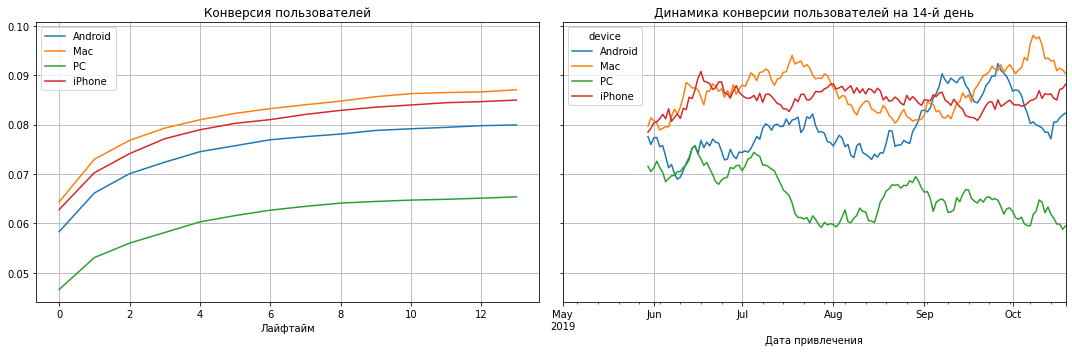

In [54]:
plot_conversion(conversion_pay_d, conversion_history_pay_d, 14, window=30)

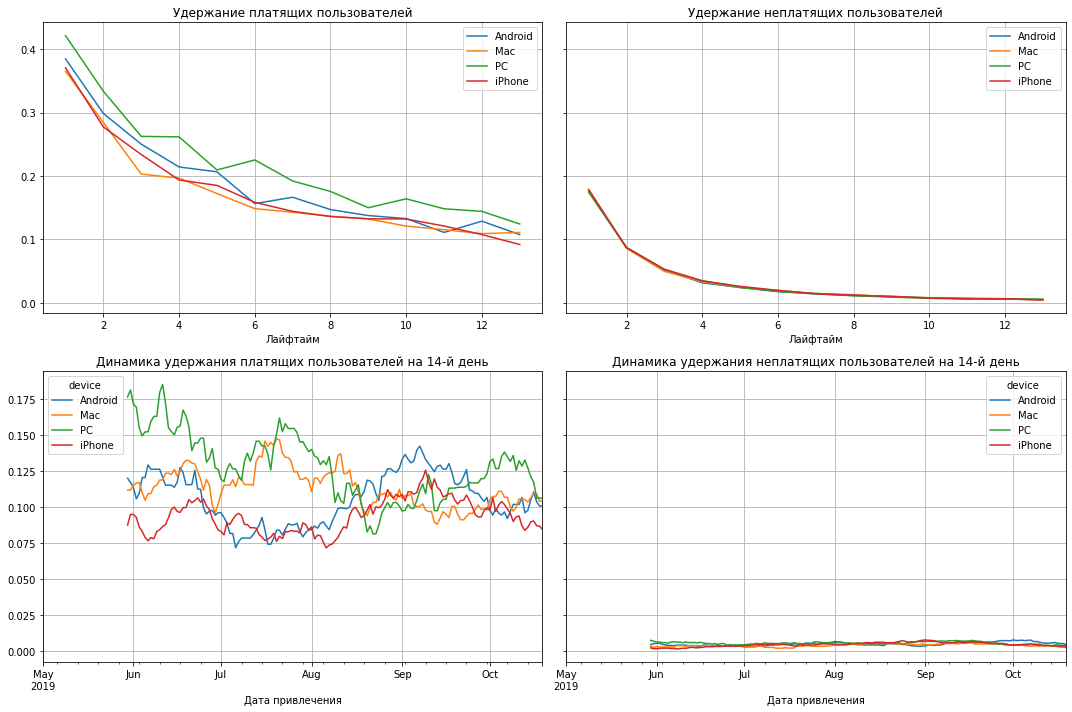

In [55]:
plot_retention(retention_pay_d, retention_history_pay_d, 14, window=30)

<p></p>

<div style="border:solid black 1px; padding: 20px">
    Конверсия пользователей, привлеченных рекламными источниками, выше среди пользователей iPhone и Mac, самая низкая - у пользователей PC, и несколько снижается в течение полугода. В отношении удержания платящих пользователей картина меняется на противоположную: пользователи iPhone и Mac быстрее теряют интерес к приложению, пользователи PC дольше пользуются приложением. Динамика удержания для платящих пользователей всех устройств нестабильна, колеблется с большим диапазоном, а для пользователей PC заметна тенденция к снижению. Различия в уровне и динамике удержания среди неплатящих клиентов несущественны. <p>
</div>
<p></p>

##### Расчитаем и визуализируем конверсию пользователей и ее динамику по странам:

In [56]:
conversion_raw_pay_r, conversion_pay_r, conversion_history_pay_r = get_conversion(pay, orders, observation_date, 14,['region'])
retention_raw_pay_r, retention_pay_r, retention_history_pay_r = get_retention(pay, visits, observation_date, 14,['region'])

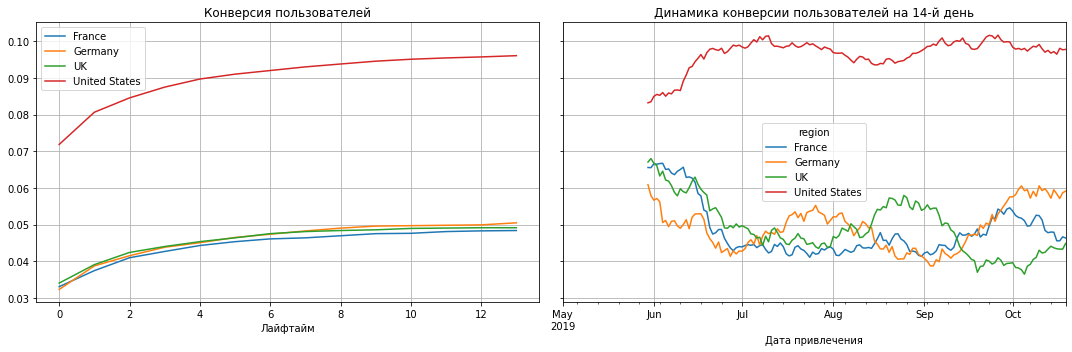

In [57]:
plot_conversion(conversion_pay_r, conversion_history_pay_r, 14, window=30)

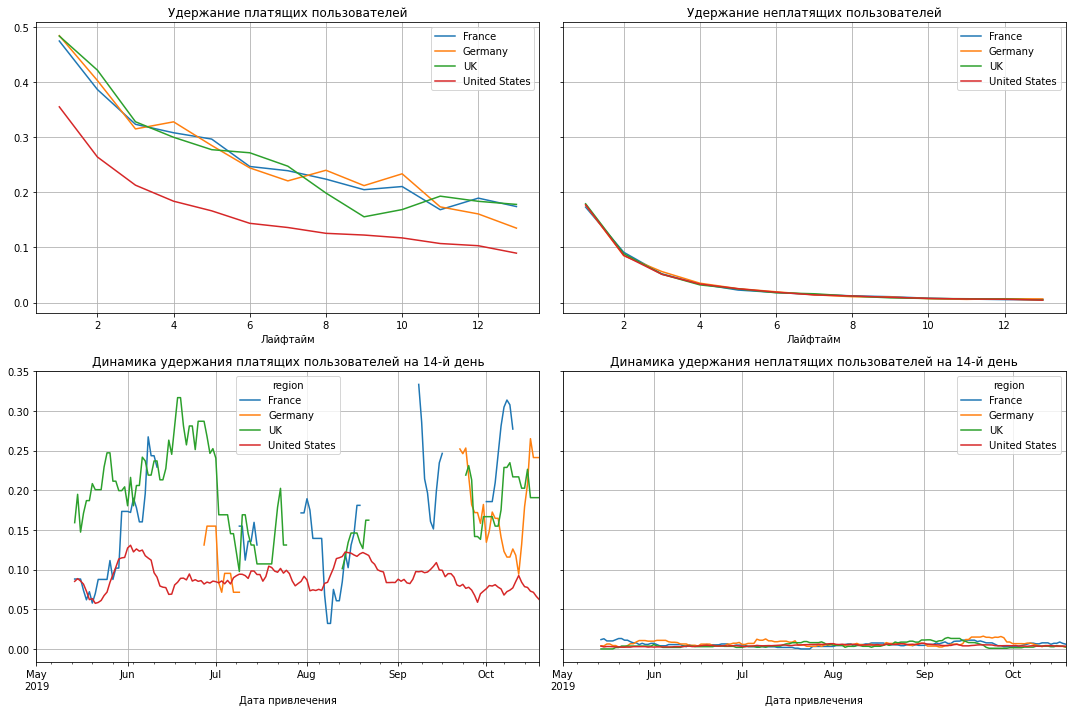

In [58]:
plot_retention(retention_pay_r, retention_history_pay_r, 14, window=14)

<p></p>

<div style="border:solid black 1px; padding: 20px">
    Конверсия пользователей в США значительно выше, чем у пользователей в странах Европы, различия между последними незначительны. За анализируемый период конверсия пользователей в США немного возросла, в то время как в Европе, наоборот, намечается тенденция к снижению конверсии, особенно заметная для пользователей Франции и Великобритании. При этом пользователи США быстрее теряют интерес к приложению, чем европейцы. Амплитуда колебаний динамики удержания платящих клиентов очень широка. Различия в уровне и динамике удержания среди неплатящих клиентов несущественны. <p>
</div>
</div>
<p></p>

##### Расчитаем и визуализируем конверсию пользователей и ее динамику по рекламным источникам:

In [59]:
conversion_raw_pay_c, conversion_pay_c, conversion_history_pay_c = get_conversion(pay, orders, observation_date, 14,['channel'])
retention_raw_pay_c, retention_pay_c, retention_history_pay_c = get_retention(pay, visits, observation_date, 14,['channel'])

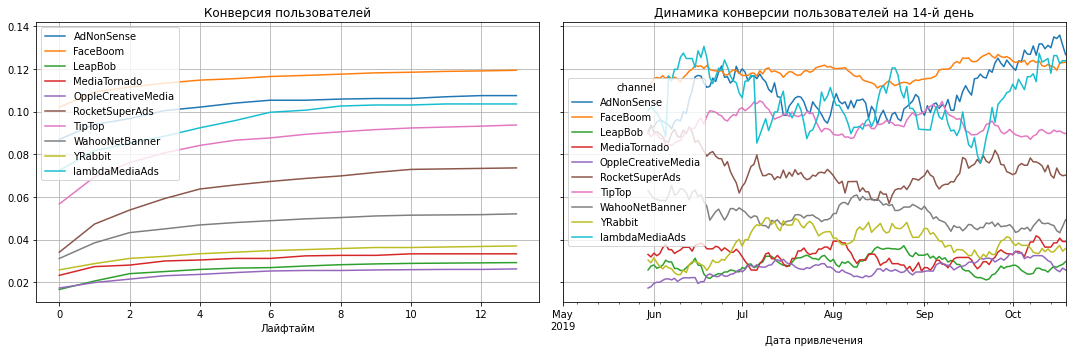

In [60]:
plot_conversion(conversion_pay_c, conversion_history_pay_c, 14, window=30)

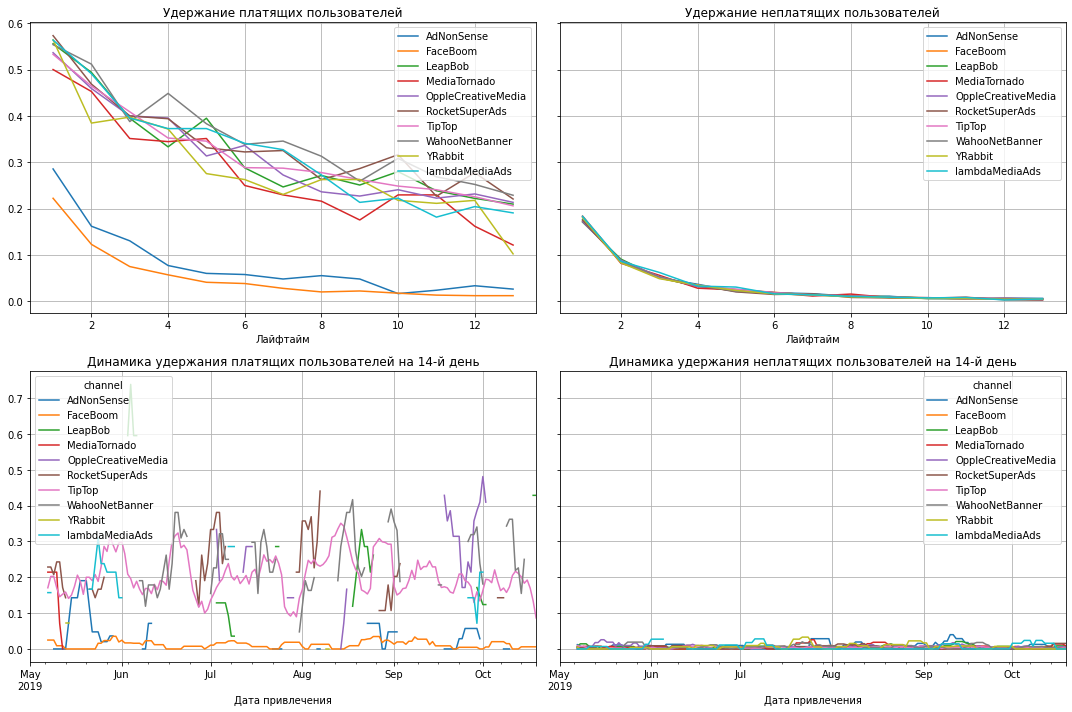

In [61]:
plot_retention(retention_pay_c, retention_history_pay_c, 14, window=7)

<p></p>

<div style="border:solid black 1px; padding: 20px">
    Среди рекламных источников лидерами по конверсии и одновременно отстающими по удержанию платящих пользователей являются AdNonSense и FaceBoom. Среди прочих рекламных источников по удержанию платных клиентов четких различий не наблюдается, а относительно высокую конверсию показывают lambdaMediaAds, TipTop и RocketSuperAds. Для неплатящих клиентов различий не обнаружено.
</div> 
<p></p>

##### Расчитаем и визуализируем окупаемость рекламы с разбивкой по устройствам:

In [62]:
ltw_raw_pay_device, ltv_pay_device, ltv_history_pay_device, roi_pay_device, roi_history_pay_device = get_ltv(
    pay, orders, observation_date, 14, ['device'])

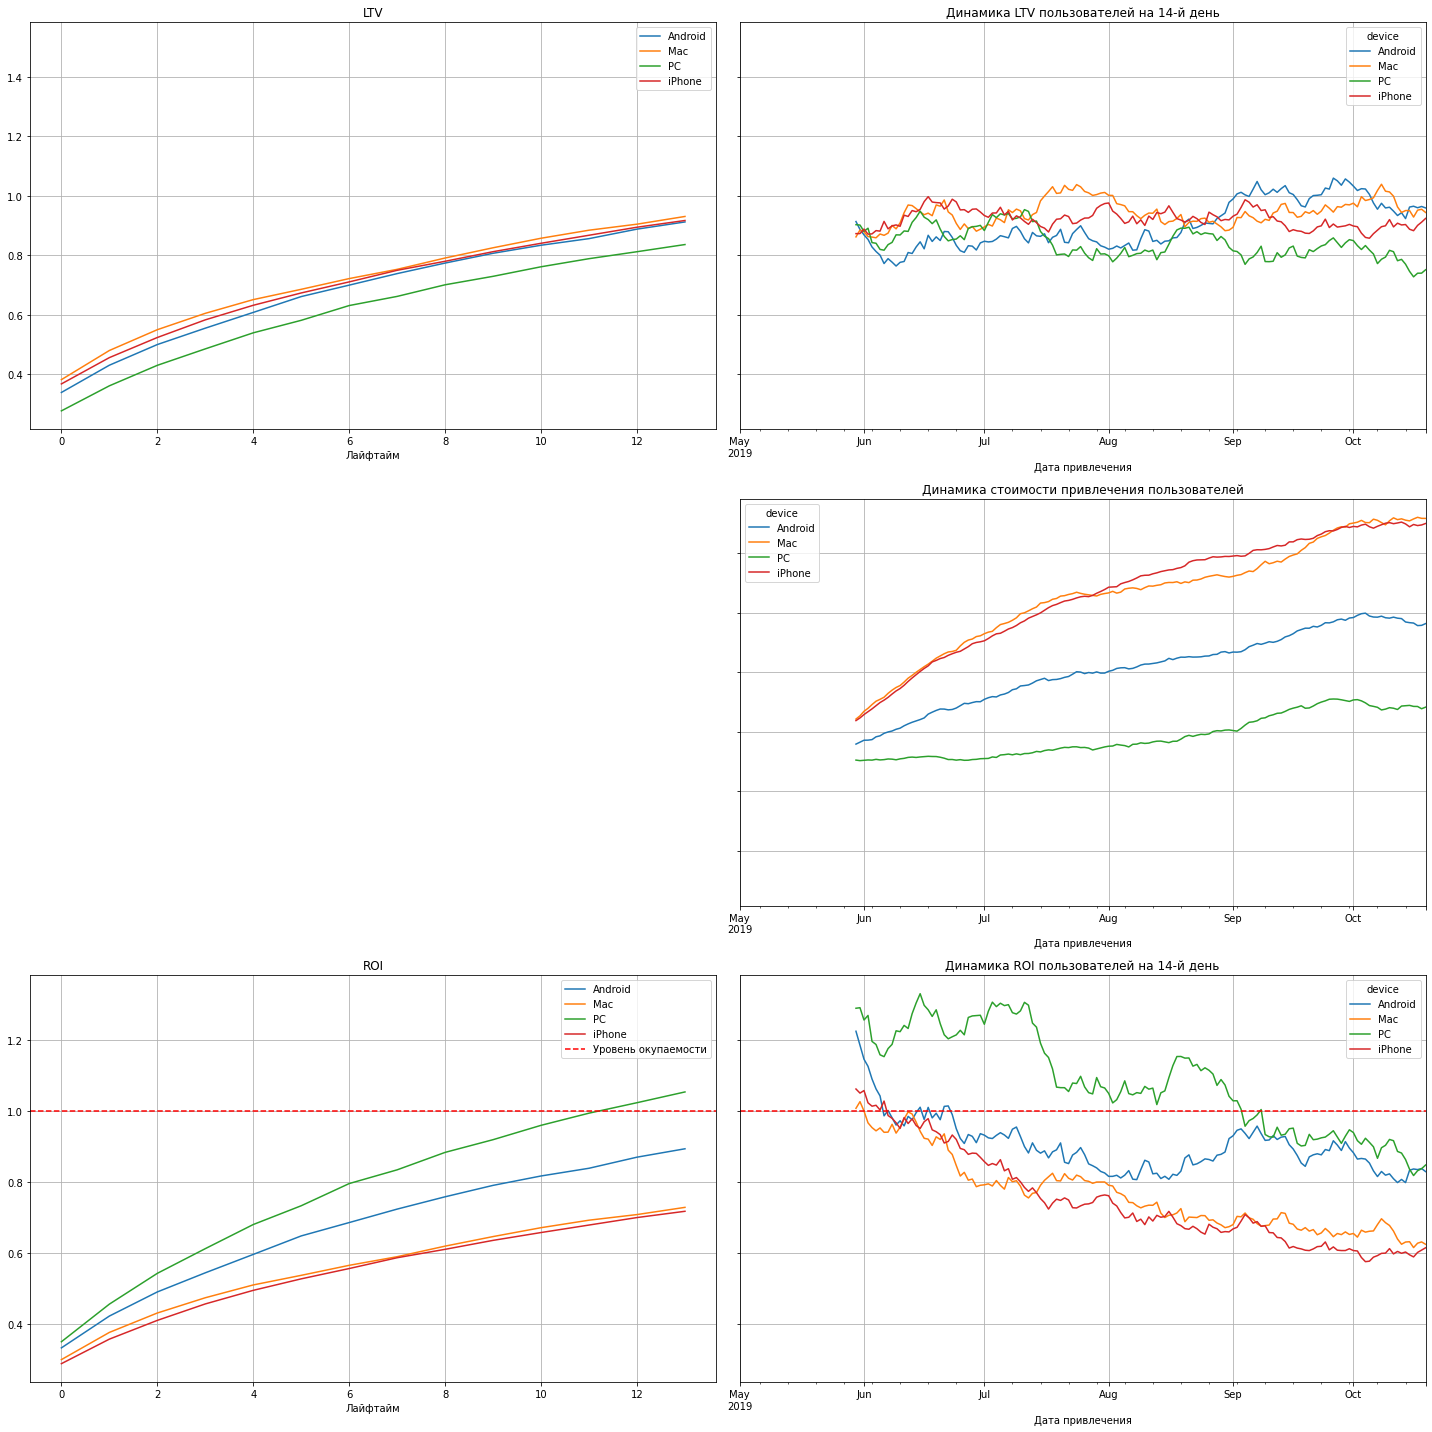

In [63]:
plot_ltv_roi(ltv_pay_device, ltv_history_pay_device, roi_pay_device, roi_history_pay_device, 14, window=30)

<p></p>

<div style="border:solid black 1px; padding: 20px">
     Различия между когортами по уровню LTV невелики, но за счет больших различий в стоимости привлечения окупаемость рекламы различается.<p>
    Единственная когорта, на 11 день достигающая порога окупаемости, - пользователи приложения, пользующихся PC: у данной когорты самая низкая LTV, но  и самая низкая стоимость привлечения пользователя. <p>
Самая высокая стоимость привлечения пользователей на Mac и iPhone, причем за период анализа именно для этих когорт стоимость привлечения возросла сильнее прочих. Окупаемость рекламы для данных когорт самая низкая и значительно снизилась за анализируемый период.
    </div>
<p></p>

##### Расчитаем и визуализируем окупаемость рекламы с разбивкой по странам:

In [64]:
ltw_raw_pay_region, ltv_pay_region, ltv_history_pay_region, roi_pay_region, roi_history_pay_region = get_ltv(
    pay, orders, observation_date, 14, ['region'])

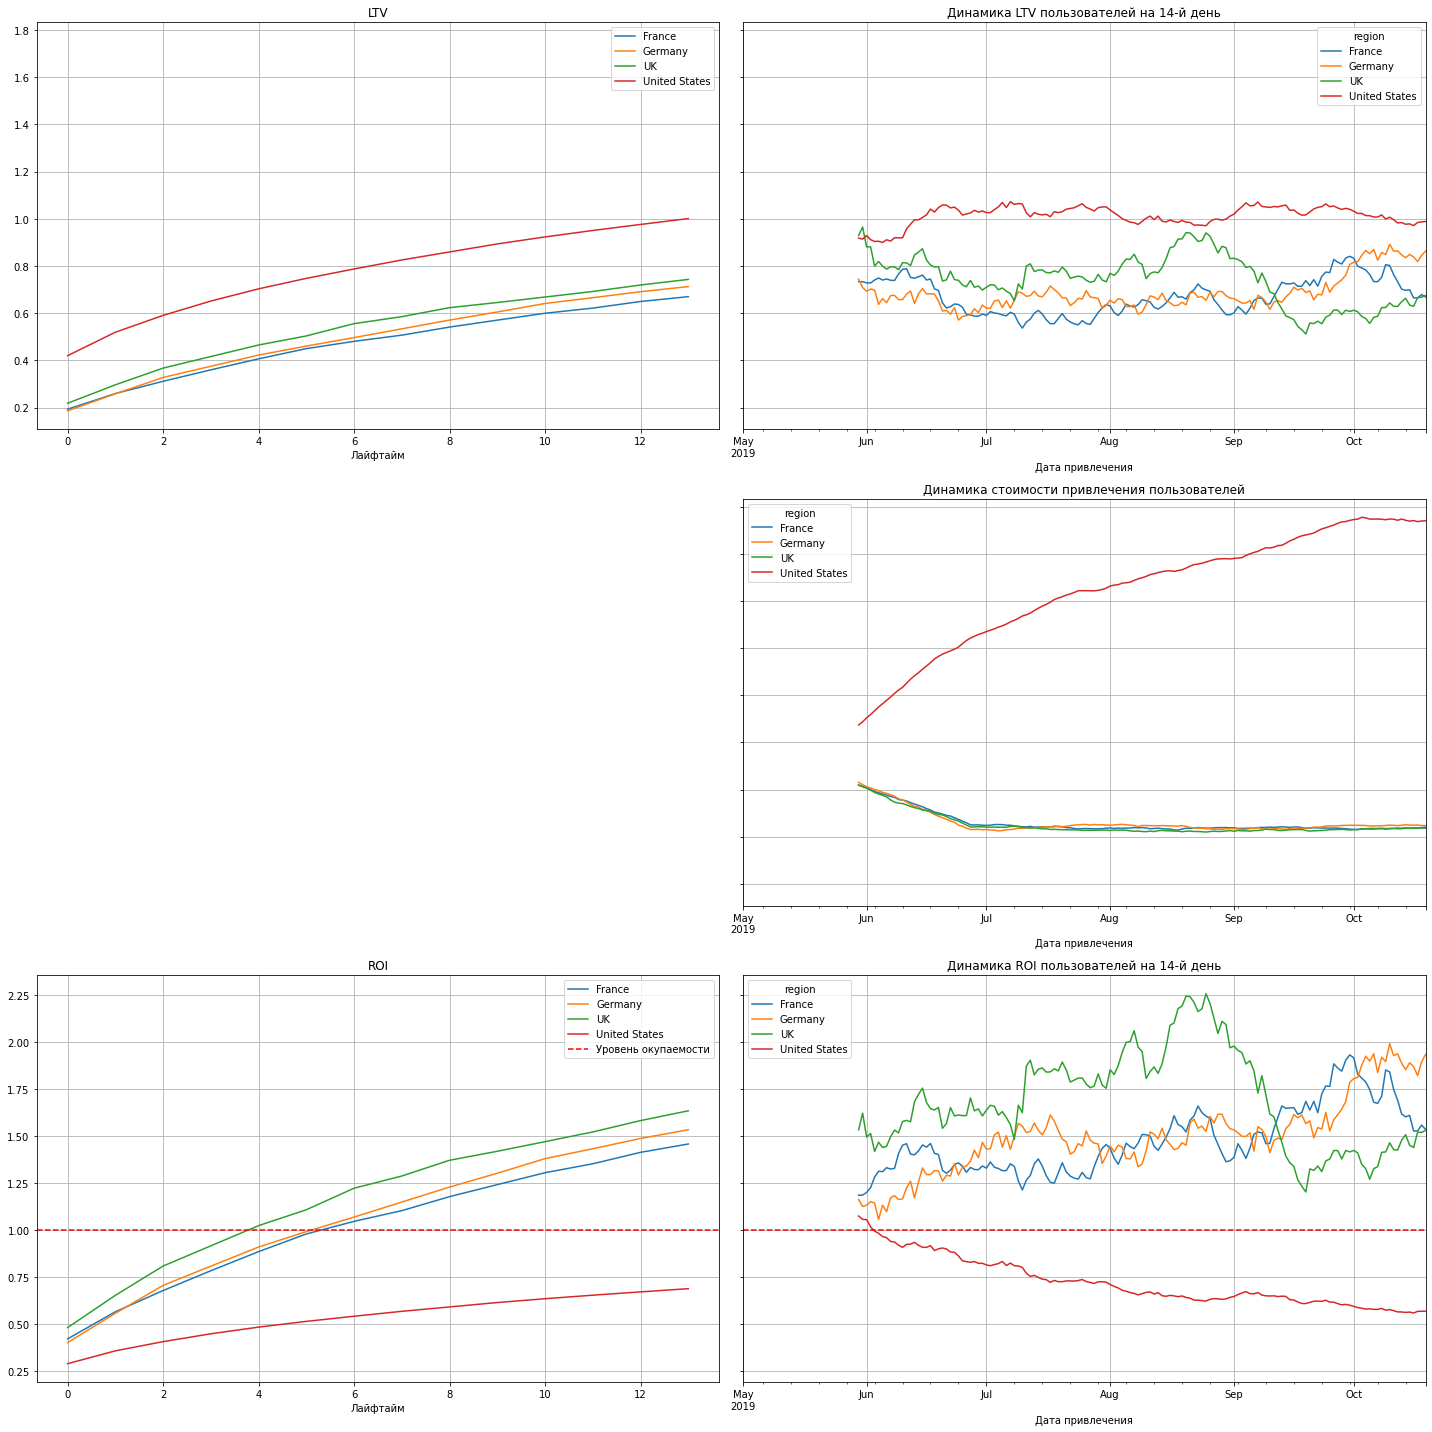

In [65]:
plot_ltv_roi(ltv_pay_region, ltv_history_pay_region, roi_pay_region, roi_history_pay_region, 14, window=30)

<p></p>

<div style="border:solid black 1px; padding: 20px">
     При анализе пользователей по странам обнаруживаются существенные различия между пользователями США и пользователями из других стран.<p>
    Так, только расходы на рекламу для привлечения пользователей в США, несмотря на самый высокий LTV этой когорты, не окупаются. Для данной когорты очень высокая стоимость привлечения пользователя, которая значительно возросла за анализируемый период, соответственно, окупаемость рекламы стабильно снижается в течение полугода. <p>
Стоимость привлечения пользователей в странах Европы сопоставима между собой, немного снизилась к июлю и с того момента удерживается на стабильном уровне, окупаемость при этом достигается в среднем на 4-5 день в разных странах. Кроме того для окупаемость рекламы для привлечения пользователей из Франции и Германии немного выросла за полугодие.
    </div>
<p></p>

##### Расчитаем и визуализируем окупаемость рекламы с разбивкой по рекламным каналам:

In [66]:
ltw_raw_pay_channel, ltv_pay_channel, ltv_history_pay_channel, roi_pay_channel, roi_history_pay_channel = get_ltv(
    pay, orders, observation_date, 14, ['channel'])

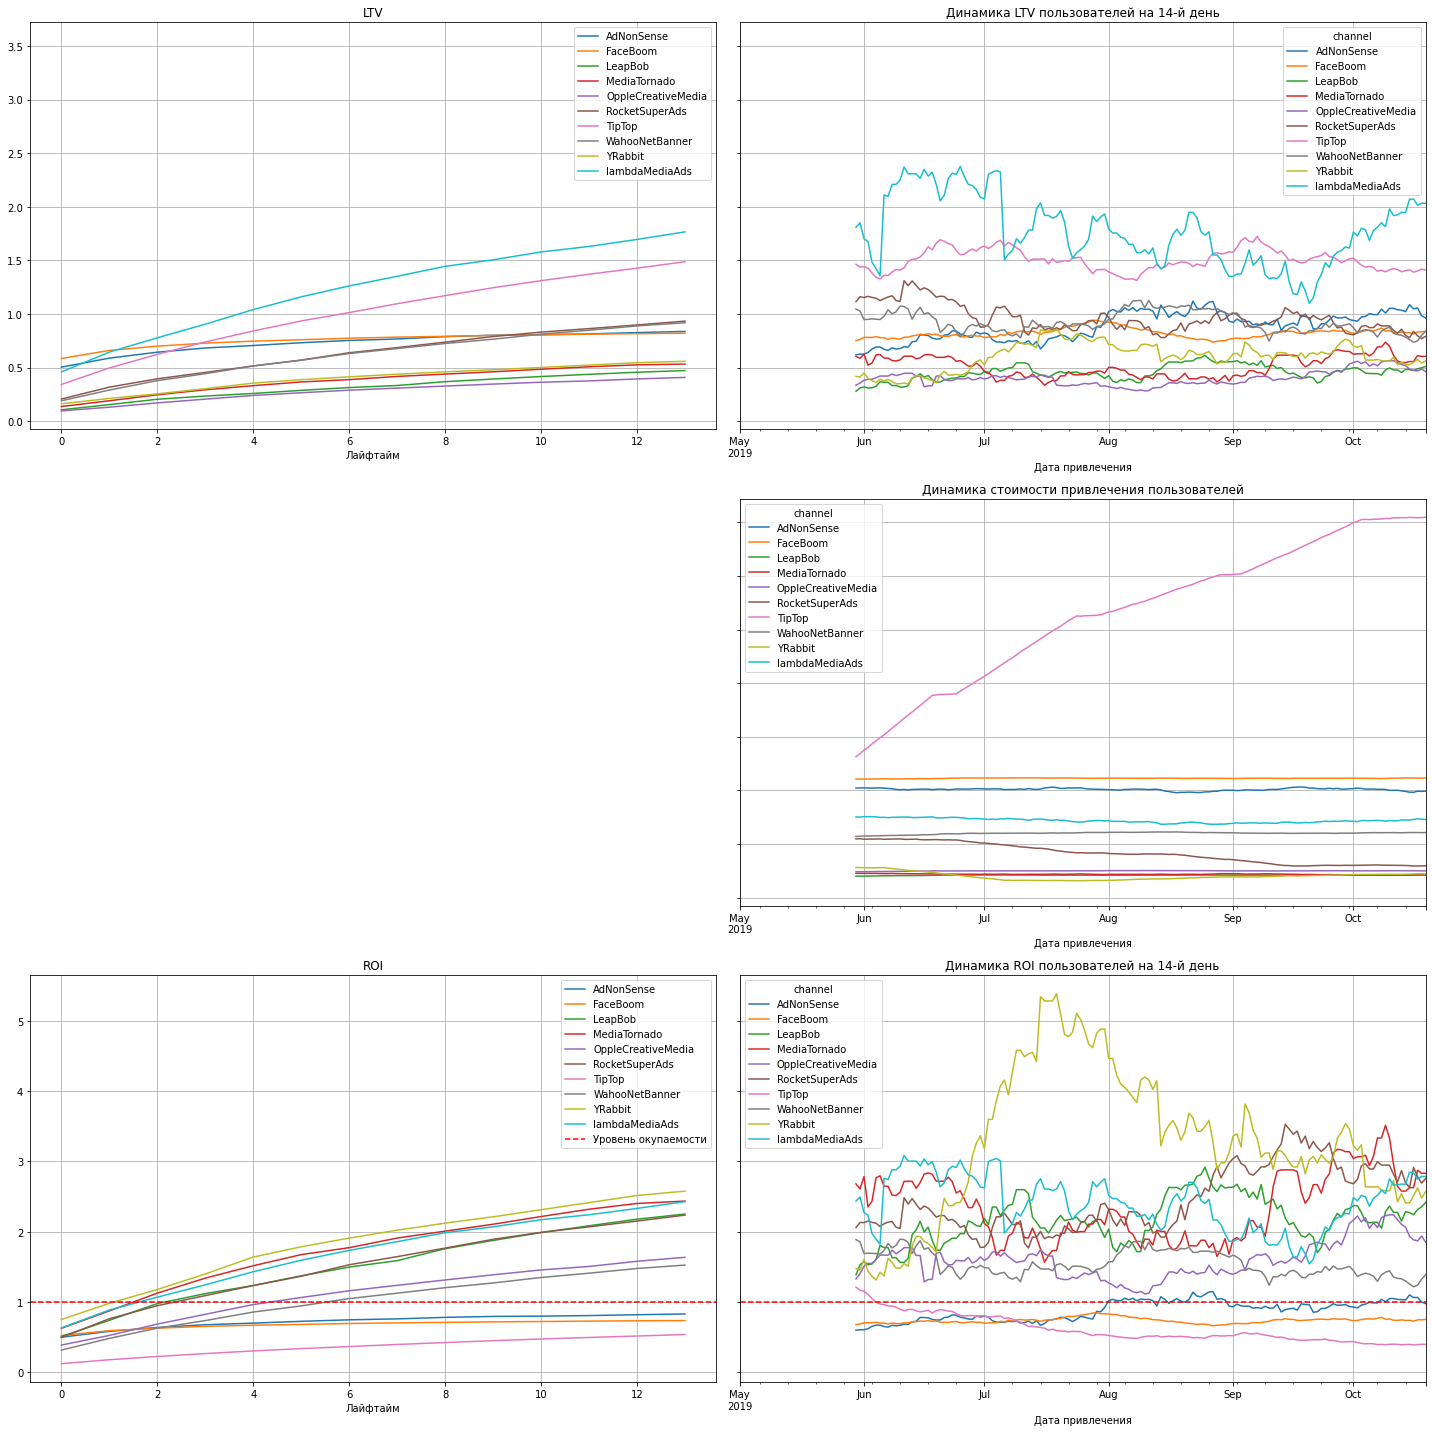

In [67]:
plot_ltv_roi(ltv_pay_channel, ltv_history_pay_channel, roi_pay_channel, roi_history_pay_channel, 14, window=30)

<p></p>

<div style="border:solid black 1px; padding: 20px">
    Самая высокая стоимость привлечения пользователей и при этом самая низкая окупаемость рекламы на TipTop. Это единственный рекламный источник, по которому наблюдается рост стоимости привлечения клиентов за полугодие, остальные сохраняют стабильность или немного снижают CAC.<p>
    Еще два рекламных источника - FaceBoom и AdNonSense - также не достигают окупаемости рекламы, хотя стоимость привлечения пользователя у них за анализируемый период не изменилась. <p>
Остальные рекламные источники окупаются в течение первой недели, при этом наилучший результат показывают затраты на рекламу в YRabbit, MediaTornado и lambdaMediaAds, окупающиеся в течение 2 дней.
    </div>
<p></p>

##### Проанализируем распределение пользователей из разных рекламных каналов по странам и устройствам:

In [68]:
pay.pivot_table(index='channel', columns='region', values='user_id', aggfunc='count').merge(
    pay.pivot_table(index='channel', columns='device', values='user_id', aggfunc='count'), on='channel', how='left').merge(
    channel_cost, on='channel', how='left').sort_values(by=(['United States','cac']), ascending=False).drop(
    columns=['all_users', 'payers'])

,France,Germany,UK,United States,Android,Mac,PC,iPhone,cac,CR
channel,,,,,,,,,,
FaceBoom,NaN,NaN,NaN,29144.0,5875,7265,3008,12996,1.113286,0.122049
TipTop,NaN,NaN,NaN,19561.0,3889,4820,2012,8840,2.799003,0.096007
RocketSuperAds,NaN,NaN,NaN,4448.0,928,1137,466,1917,0.412095,0.079137
MediaTornado,NaN,NaN,NaN,4364.0,879,1105,453,1927,0.218717,0.035747
YRabbit,NaN,NaN,NaN,4312.0,865,1097,482,1868,0.218975,0.038265
AdNonSense,1366.0,1219.0,1295.0,NaN,1109,410,1563,798,1.008054,0.113402
lambdaMediaAds,742.0,649.0,758.0,NaN,613,241,862,433,0.724802,0.104700
WahooNetBanner,2971.0,2579.0,3003.0,NaN,2577,856,3409,1711,0.602245,0.052964
OppleCreativeMedia,2991.0,2562.0,3052.0,NaN,2526,882,3496,1701,0.250000,0.027077


<p></p>

<div style="border:solid black 1px; padding: 20px">
Два самых дорогостоящих и нерентабельных рекламных источника FaceBoom и TipTop	ориентированы на пользователей из США примущестенно с iPhone или Mac. Учитывая, что для пользователей из США характерно преимущественное использвание iPhone или Mac, а прочие рекламные источники в США показывают стоимость привлечения пользователей ниже, можно сделать вывод, что стоимость привлечения пользователей FaceBoom и TipTop завышена.<p>
Третий нерентабельный канал рекламы AdNonSense работает с пользователями в странах Европы.<p>
Из быстро окупающихся рекламных источников с пользователям в США работают YRabbit и MediaTornado, в Европе - lambdaMediaAds.
</div>
<p></p>

##### Проверим окупаемость рекламы без учета FaceBoom и TipTop:

In [69]:
pay1=pay.loc[(pay['channel']!='FaceBoom')&(pay['channel']!='TipTop')]
ltw_raw_pay1, ltv_pay1, ltv_history_pay1, roi_pay1, roi_history_pay1 = get_ltv(
    pay1, orders, observation_date, 14, ['region'])

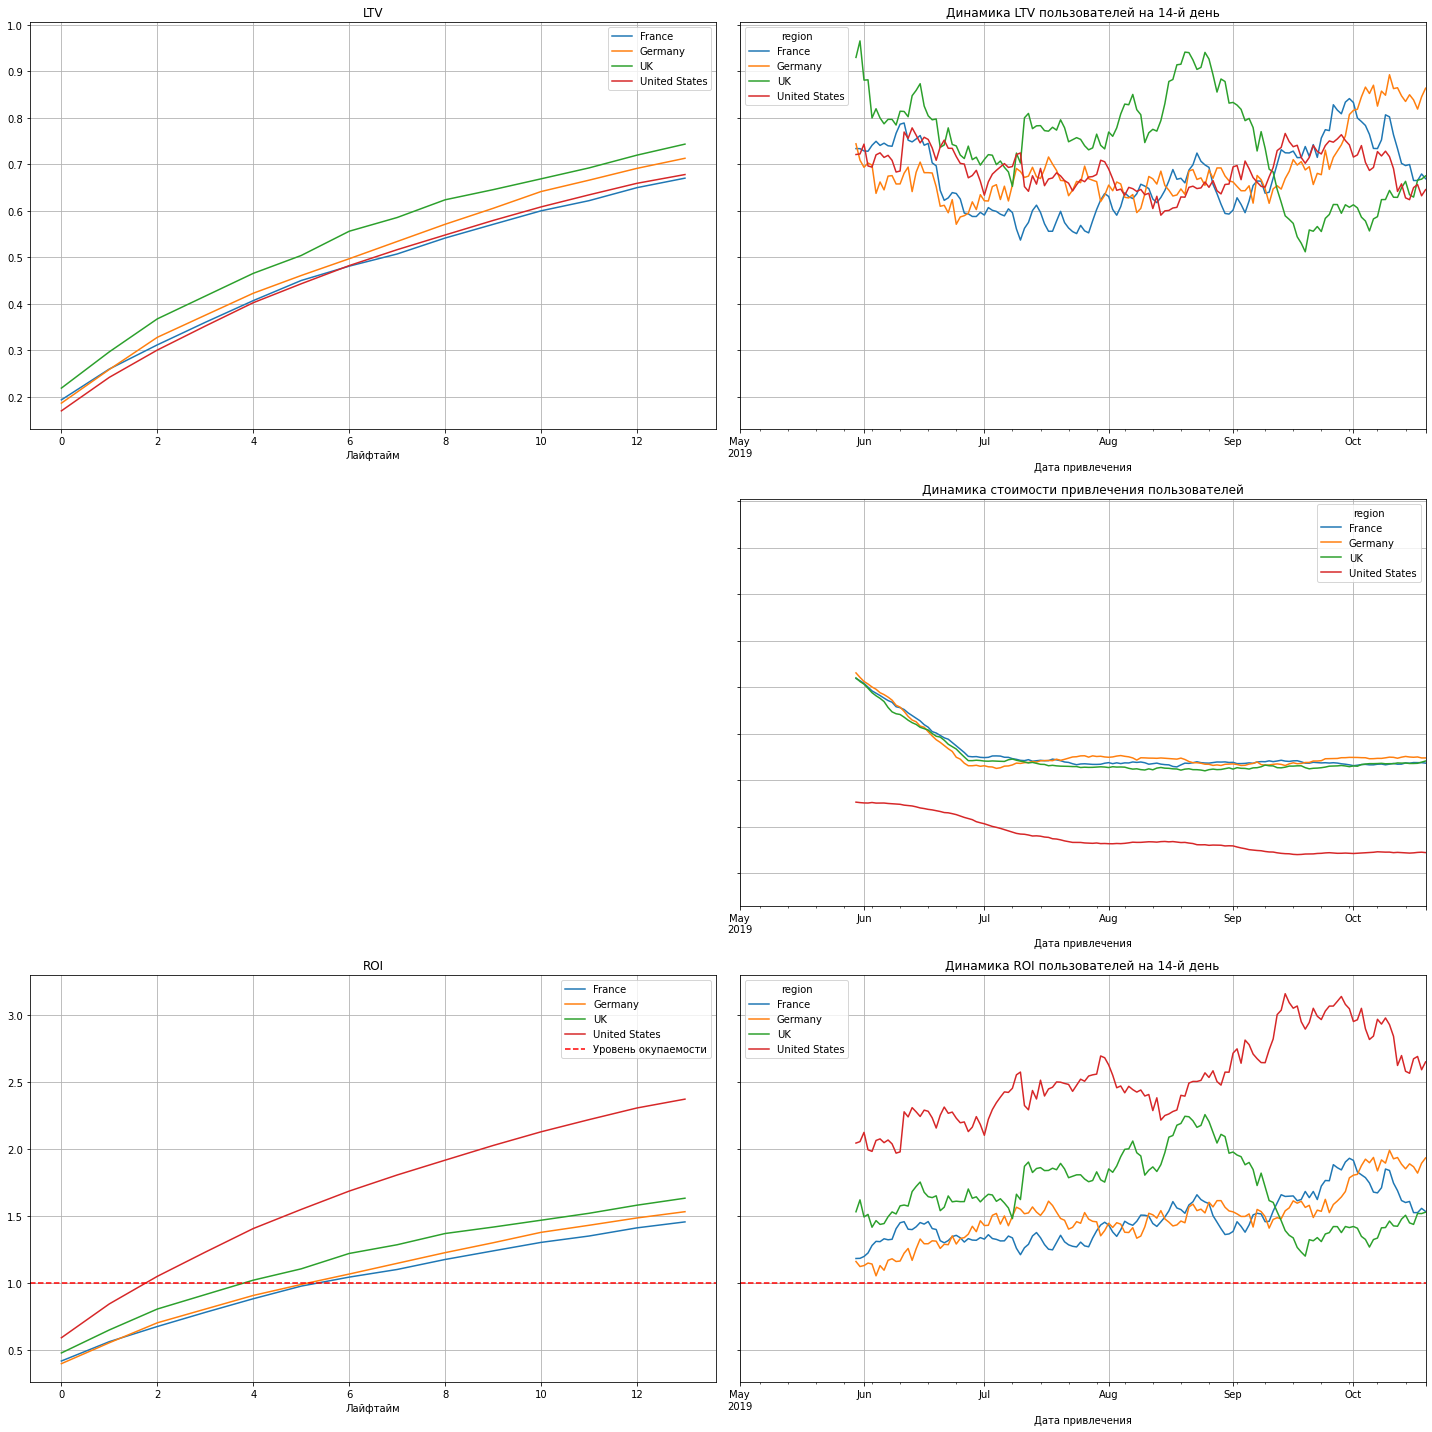

In [70]:
plot_ltv_roi(ltv_pay1, ltv_history_pay1, roi_pay1, roi_history_pay1, 14, window=30)

In [71]:
ltw_raw_pay2, ltv_pay2, ltv_history_pay2, roi_pay2, roi_history_pay2 = get_ltv(
    pay1, orders, observation_date, 14, ['device'])

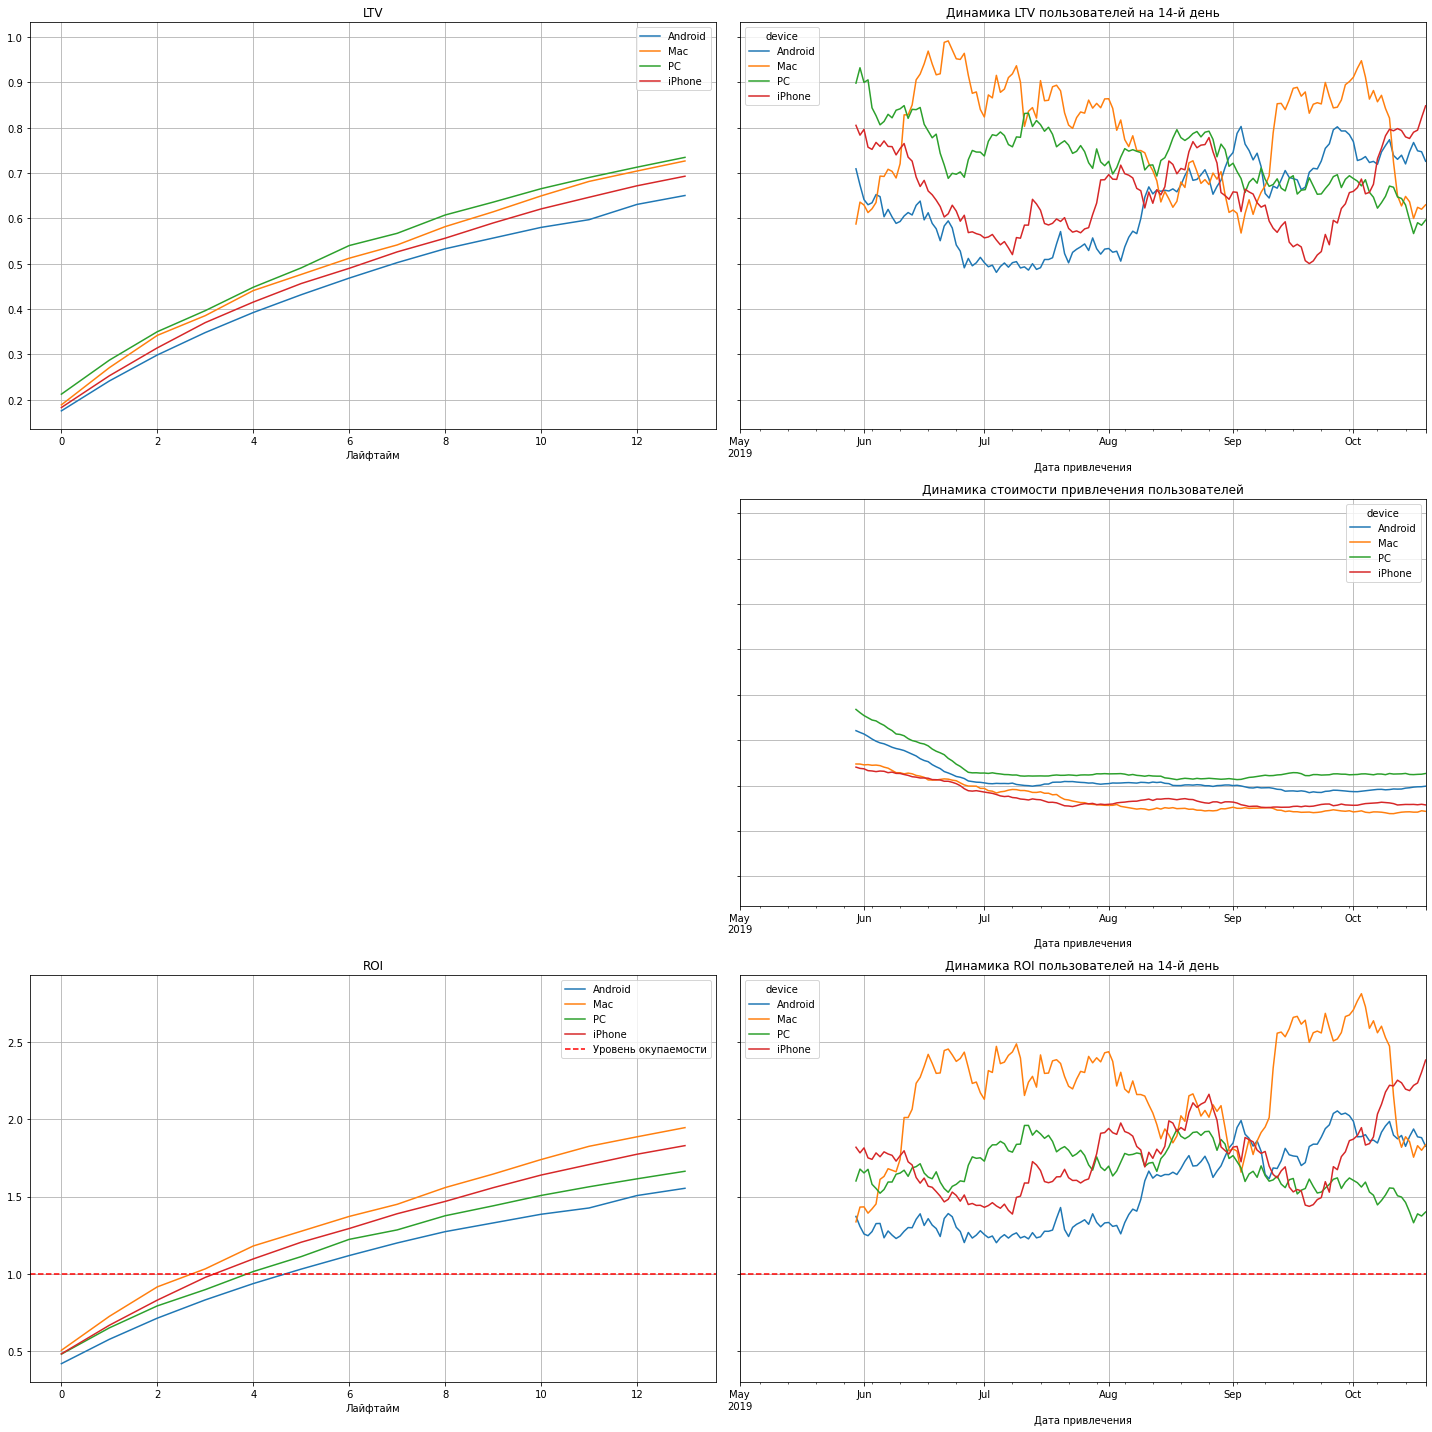

In [72]:
plot_ltv_roi(ltv_pay2, ltv_history_pay2, roi_pay2, roi_history_pay2, 14, window=30)

<p></p>

<div style="border:solid black 1px; padding: 20px">
Диаграммы показывают, что затраты на рекламу FaceBoom и TipTop снижают окупаемость рекламы как по региону, так и в отношении всех устройств.
</div>
<p></p>


### Вывод

<p></p>

<div style="border:solid green 2px; padding: 20px">

Мы проверили окупаемость рекламы в когортах с разбивкой по регионам, устройствам и рекламным источникам. Низкие показатели окупаемости рекламы в США и для пользователей устройств, в большей степени iPhone и Mac, связаны с завышенной ценой привлечения клиентов через FaceBoom и TipTop. Третий нерентабельный канал рекламы - AdNonSense, который работает с пользователями в странах Европы.<p>
Рекомендуется рассмотреть возможность изменения методов оплаты рекламы в FaceBoom, TipTop и AdNonSense для снижения стоимости привлечения клиента или отказаться от услуг данных агентств. 
</div>




##  Общий вывод

<p></p>

<div style="border:solid green 2px; padding: 20px">

В исследовании проанализирована информация о 309901 сессиях пользователей в приложении Procrastinate Pro+, 40212 покупках и 1800 рекламных кампаниях.<p>
Заданы функции для вычисления значений метрик и визуализации Retention Rate, конверсии, LTV, CAC и ROI.<p>
    
В период с 1 мая по 27 октября 2019 года к приложению присоединились 150008 пользователей, конверсия пользователей в платящих клиентов составляет менее 6%.<p>
Наибольшее количество пользователей приложения, а также платящих клиентов, проживают в США и пользуются приложением с мобильных устройств iPhone.<p>
    
Расходы на маркетинг за анализируемый период составили более 100 000$. Более половины составляет оплата рекламы на TipTop, треть затрат приходится на FaceBoom. Именно по этим рекламным источникам произошел значительный рост расходов как в абсолютных значениях, так и в стоимости привлечения одного клиента. Остальные обходятся компании дешевле и расходы на их услуги сохраняются на стабильном, невысоком уровне, а цена привлечения пользователя ниже и сохраняется на одном уровне в течение анализируемого периода.<p>

Мы проверили окупаемость рекламы в когортах с разбивкой по регионам, устройствам и рекламным источникам. Самые низкие показатели окупаемости рекламы обнаружены в США и для пользователей устройств iPhone и Mac. Основной причиной такой ситуации является завышенная цена привлечения клиентов через FaceBoom и TipTop, самыми затратными рекламными источниками. Третий нерентабельный канал рекламы - AdNonSense, который работает с пользователями в странах Европы, за счет не очень высокой общей суммы затрат не так сильно снижает показатели по региону.

Для повышения эффективности привлечения пользователей рекомендуется:<p>

- рассмотреть возможность изменения методов оплаты рекламы в FaceBoom, TipTop и AdNonSense для снижения стоимости привлечения клиента или отказаться от услуг данных агентств;

- в случае отказа от услуг вышеуказанных агентств целесообразным представляется расширение сотрудничества с наиболее эффективными рекламными источниками по регионам: в США - YRabbit и MediaTornado, в Европе - lambdaMediaAds.<p>
    
</div>

